In [1]:
# DIKKAT `INT_1` TEAM UYESI ---> LUTFEN OKU:)) 

# Calismaya baslamadan once Github Desktop'ta Branchinda oldugundan emin ol!
# Main branch'i kendi Branch'ina aktarmayi (merge) unutma
# Sadece ve sadece kendi Branchinda kal!
# Kendi Branch'inda iken calis ve COMMIT yap! 

# Github Proje klasorunde SADECE sana ayrilmis olan klasorunde calis-degisiklik yap. 
# Baskasinin veya ortak bir dosyada asla degisiklik yapma!
# Buddy arkadasin ile ortak notebooklarinizda degisiklik yapmadan once onunla haberles! 

# HIC Emin degilsen PROJENIN GUVENLIGI ICIN github proje klasoru disinda bireysel bir klasorunde datalari kopyalayip alabilir ve lokalinde calisabilirsin. 
# Calismandan emin olduktan sonra gerekli dosyalari Github Proje klasoru icinde sana ayrilmis olan dosya icine ekleyebilirin
# GitHub'a COMMIT-PUSH yaptiginda --> slackta --> GITHUB_UPDATE kanalindan bilgi vermeyi unutma!!

# UTILS classinda isini kolaylastiracak fonksiyonlar ekledik, goz atabilirsin, asagida nasil kullancagini gosterdik.
# Eger sende kullanisli bir fonksiyon bulursan UTILS classina uygun hale getirip-calistirip-test ettikten sonra 
#  benimle paylasirsan ortak utils dosyasina code'unu eklerim, diger arkadaslarinin da isini kolaylastirmis olursun:)

# Okudugun icin tesekkurler iyi calismalar:)) 

# GOLDBERG MED GmbH URETIM-TAKIP-SATIS ANALIZI

**Giriş**

Bu proje, Goldberg Med GmbH’nin satış performansını analiz etmek ve iş süreçlerini iyileştirmek için Keşifsel Veri Analizi (EDA) yöntemlerini kullanmayı amaçlayacaktır. Projenin temel hedefi, mevcut veriyi anlamak, olası sorunları belirlemek ve şirketin stratejik karar alma süreçlerine katkıda bulunmaktır.

**Proje Hedefleri:**

1. Mevcut veri setini inceleyerek verinin yapısını ve özelliklerini anlamak.
2. Satış performansı ile ilgili temel trendleri ve desenleri keşfetmek.
3. Verinin kalitesini artırmak için temizleme işlemleri yapmak (eksik ve anormal verileri tespit ve düzeltme).
4. Elde edilen bulgular doğrultusunda, şirketin pazardaki konumunu güçlendirecek öneriler geliştirmek.

**Proje Adımları:**

1. **Veri Toplama ve Tanımlama:** Şirketten elde edilen satış verileri ve iş süreçlerine dair bilgiler incelenecek ve analiz için hazırlanacaktır.
2. **Keşifsel Veri Analizi (EDA):** 
3. **Veri Temizleme:** Veri setindeki eksik veya hatalı veriler tespit edilerek gerekli düzenlemeler yapılacaktır.
3. **Analiz ve Gorsellestirme:** Verinin genel dağılımı, temel istatistikler ve görselleştirme teknikleri ile incelenecektir. Bu adımda, verinin temel trendleri ve değişkenler arasındaki ilişkiler analiz edilecektir.
4. **Bulgular ve Yorumlar:** Elde edilen analiz sonuçları yorumlanarak, satış performansını etkileyen faktörler üzerine odaklanılacaktır.
5. **Sonuçlar ve Öneriler:** Şirketin satışlarını artırmaya yönelik stratejik öneriler geliştirilecek ve ileriye dönük analizlerin yapılması için yol haritası sunulacaktır.

**Sonuçlar:**

Bu proje, Goldberg Med GmbH’nin satış verilerini analiz ederek, performansı artırmaya yönelik içgörüler sunacaktır. Analiz süreci, şirketin iş süreçlerinde verimliliği artırabilecek potansiyel alanları belirleyecek ve bu alanlarda uygulanabilecek stratejiler geliştirecektir. Elde edilen veriler doğrultusunda, şirketin pazar payını artırmak ve satışları optimize etmek için uygulanabilecek öneriler raporda detaylı olarak sunulacaktır.

## Imports Libraries

In [ ]:
#pip install dateparser

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import cufflinks as cf
%matplotlib inline 
import os
import sys
from scipy import stats
from datetime import datetime
import dateparser


pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings("ignore")

## Load Datasets

### df All   (withKartus)

In [14]:
# Dataseti kendi klasorune kopyala al ve direk okut

df0 = pd.read_csv('merged_satis_uretim_data_27_Ekim.csv')
df_all = df0.copy()

print(df_all.shape)
df_all.head(2)

(32646, 18)


,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
0,AMELIYAT MASASI,ÖZEL,2018/006,6/29/2018,ÖZEL FSM TIP MERKEZİ,ÖZEL FSM TIP MERKEZİ,İSTANBUL,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-012,20 GÜN,7/18/2018,NaN,NaN,NaN,NaN,NaN
1,AMELIYAT MASASI,DEMO,2018/007,2/14/2018,DEMO,DERİNCE EĞİTİM VE ARAŞTIRMA HASTANESİ,KOCAELİ,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-003,21 GÜN,NaN,NaN,NaN,NaN,NaN,NaN


### df_filtered (noKartus)

In [3]:
# # 'KARTUS' kategorisini filtreleyip sadece kartusta olan sütunları drop et:
# df_filtered = df_all[df_all['kategori'] != 'KARTUS'].drop(columns=['solusyon_fatura', 'bidon_acilisi', 'aciklama'])
# df_filtered.head(2)

# # date_columns DataFrame'ini CSV olarak kaydetme
# df_filtered.to_csv('data_NoKartus_29Ekim.csv', index=False)

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
0,AMELIYAT MASASI,ÖZEL,2018/006,6/29/2018,ÖZEL FSM TIP MERKEZİ,ÖZEL FSM TIP MERKEZİ,İSTANBUL,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-012,20 GÜN,7/18/2018,NaN,NaN
1,AMELIYAT MASASI,DEMO,2018/007,2/14/2018,DEMO,DERİNCE EĞİTİM VE ARAŞTIRMA HASTANESİ,KOCAELİ,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-003,21 GÜN,NaN,NaN,NaN


In [3]:
#============= read_CSV ==================
df_noKartus = pd.read_csv('data_NoKartus_29Ekim.csv')
df_filtered = df_noKartus.copy()

print(df_filtered.shape)
df_filtered.head(2)

(2520, 15)


,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
0,AMELIYAT MASASI,ÖZEL,2018/006,6/29/2018,ÖZEL FSM TIP MERKEZİ,ÖZEL FSM TIP MERKEZİ,İSTANBUL,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-012,20 GÜN,7/18/2018,NaN,NaN
1,AMELIYAT MASASI,DEMO,2018/007,2/14/2018,DEMO,DERİNCE EĞİTİM VE ARAŞTIRMA HASTANESİ,KOCAELİ,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-003,21 GÜN,NaN,NaN,NaN


In [15]:
df_all.info() #kartus dahil

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32646 entries, 0 to 32645
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   kategori         32646 non-null  object 
 1   satis_turu       29480 non-null  object 
 2   siparis_no       27743 non-null  object 
 3   siparis_tarihi   30830 non-null  object 
 4   siparisi_veren   31216 non-null  object 
 5   kurulum_yeri     2519 non-null   object 
 6   il               31083 non-null  object 
 7   urun_modeli      2450 non-null   object 
 8   urun_adi         31119 non-null  object 
 9   litre            2245 non-null   object 
 10  seri_no          32443 non-null  object 
 11  teslim_suresi    2223 non-null   object 
 12  teslim_tarihi    2146 non-null   object 
 13  irsaliye_tarihi  8 non-null      object 
 14  aciklama         11627 non-null  object 
 15  solusyon_fatura  5369 non-null   object 
 16  bidon_acilisi    5369 non-null   object 
 17  uts_no      

In [37]:
df_filtered.info() #kartus haric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   kategori         2520 non-null   object 
 1   satis_turu       2517 non-null   object 
 2   siparis_no       2509 non-null   object 
 3   siparis_tarihi   2513 non-null   object 
 4   siparisi_veren   2519 non-null   object 
 5   kurulum_yeri     2519 non-null   object 
 6   il               2498 non-null   object 
 7   urun_modeli      2450 non-null   object 
 8   urun_adi         2325 non-null   object 
 9   litre            2245 non-null   object 
 10  seri_no          2405 non-null   object 
 11  teslim_suresi    2223 non-null   object 
 12  teslim_tarihi    2143 non-null   object 
 13  irsaliye_tarihi  8 non-null      object 
 14  uts_no           3 non-null      float64
dtypes: float64(1), object(14)
memory usage: 295.4+ KB


### df_kartus (only Kartus data)

In [ ]:
# # 'KARTUS' kategorisini ekle
# df_kartus_filter = df_all[df_all['kategori'] == 'KARTUS']

# print(df_kartus_filter.shape)
# df_kartus_filter.head(2)

In [ ]:
# # KARTUS datsetinde bulunan sutunlardan dataset olusturma (1)

# df_kartus_filtered = df_kartus_filter[[
#     'kategori', 'satis_turu', 'siparis_no', 'siparis_tarihi', 'teslim_tarihi', 'siparisi_veren',
#     'il', 'urun_adi', 'seri_no', 'aciklama', 'solusyon_fatura', 'bidon_acilisi'
# ]]

# # date_columns DataFrame'ini CSV olarak kaydetme
# #df_kartus_filtered.to_csv('Kartus_Dataset_29Ekim.csv', index=False)

# print(df_kartus_filtered.shape)
# df_kartus_filtered.head(2)

In [4]:
#============== Read_CSV ======================
# Filtrelenerek Olusturulan Kartus dataseti son hali

df_kartus_filtered = pd.read_csv('Kartus_Dataset_29Ekim.csv')
df_kartus = df_kartus_filtered.copy()

print(df_kartus.shape)
df_kartus.head(2)

(30126, 12)


,kategori,satis_turu,siparis_no,siparis_tarihi,teslim_tarihi,siparisi_veren,il,urun_adi,seri_no,aciklama,solusyon_fatura,bidon_acilisi
0,KARTUS,NaN,2018/001,NaN,NaN,AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ,AKSARAY,KARTUŞ,2018/07-0001,NaN,NaN,NaN
1,KARTUS,NaN,2018/001,NaN,NaN,AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ,AKSARAY,KARTUŞ,2018/07-0002,NaN,NaN,NaN


In [7]:
# null deger sayisi
df_kartus.isnull().sum()

kategori               0
satis_turu          3163
siparis_no          4892
siparis_tarihi      1809
teslim_tarihi      30123
siparisi_veren      1429
il                  1541
urun_adi            1332
seri_no               88
aciklama           18499
solusyon_fatura    24757
bidon_acilisi      24757
dtype: int64

In [8]:
# not null-dolu deger sayisi
df_kartus.notnull().sum() 

kategori           30126
satis_turu         26963
siparis_no         25234
siparis_tarihi     28317
teslim_tarihi          3
siparisi_veren     28697
il                 28585
urun_adi           28794
seri_no            30038
aciklama           11627
solusyon_fatura     5369
bidon_acilisi       5369
dtype: int64

In [27]:
#=======================ilk dataseti kontrol ========================
# Kartus kategorisinin tum yillarinin merged edildigi ilk dataset (2)
# karsilastirmak icin okundu -> 'combined_kartus_25Ekim.csv'

df_kartus_allYears = pd.read_csv('combined_kartus_25Ekim.csv')
df_kartus1 = df_kartus_allYears.copy()

print(df_kartus1.shape)
df_kartus1.head(2)

# bu datasette bos olan sutunlarda var-iptal edildi

(30126, 16)


,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,aciklama,solusyon_fatura,bidon_acilisi
0,KARTUS,NaN,2018/001,NaN,AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ,NaN,AKSARAY,NaN,KARTUŞ,NaN,2018/07-0001,NaN,NaN,NaN,NaN,NaN
1,KARTUS,NaN,2018/001,NaN,AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ,NaN,AKSARAY,NaN,KARTUŞ,NaN,2018/07-0002,NaN,NaN,NaN,NaN,NaN


In [28]:
df_kartus.info()
# kartusta sadece deger iceren filtred dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30126 entries, 0 to 30125
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   kategori         30126 non-null  object
 1   satis_turu       26963 non-null  object
 2   siparis_no       25234 non-null  object
 3   siparis_tarihi   28317 non-null  object
 4   teslim_tarihi    3 non-null      object
 5   siparisi_veren   28697 non-null  object
 6   il               28585 non-null  object
 7   urun_adi         28794 non-null  object
 8   seri_no          30038 non-null  object
 9   aciklama         11627 non-null  object
 10  solusyon_fatura  5369 non-null   object
 11  bidon_acilisi    5369 non-null   object
dtypes: object(12)
memory usage: 2.8+ MB


In [29]:
df_kartus1.info()
# 4 sutun 0 deger iceriyor -eski dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30126 entries, 0 to 30125
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   kategori         30126 non-null  object 
 1   satis_turu       26963 non-null  object 
 2   siparis_no       25234 non-null  object 
 3   siparis_tarihi   28317 non-null  object 
 4   siparisi_veren   28697 non-null  object 
 5   kurulum_yeri     0 non-null      float64
 6   il               28585 non-null  object 
 7   urun_modeli      0 non-null      float64
 8   urun_adi         28794 non-null  object 
 9   litre            0 non-null      float64
 10  seri_no          30038 non-null  object 
 11  teslim_suresi    0 non-null      float64
 12  teslim_tarihi    3 non-null      object 
 13  aciklama         11627 non-null  object 
 14  solusyon_fatura  5369 non-null   object 
 15  bidon_acilisi    5369 non-null   object 
dtypes: float64(4), object(12)
memory usage: 3.7+ MB


In [ ]:
# # Veya Uzak bir klasordeki dataseti-dosyayi okumak icin dosya yolunu ver;

# # Dosya yolunu belirtelim
# file_path = r"C:\Users\duygu\Desktop\00-GitHub-Repo\00-1INTERNSHIP\01_EDA\FEATURES\04_Siparis_Teslim_IrsaliyeDate_TeslimSure\Duygu\merged_satis_uretim_data_27_Ekim.csv"

# # CSV dosyasını okuyalım
# try:
#     df_total = pd.read_csv(file_path)
#     # İlk birkaç satırı göstereceğiz
#     df_total.head()
# except FileNotFoundError:
#     "Dosya yolunda bir hata olabilir veya dosya mevcut olmayabilir."

    
# df = df_total.copy()  
# df.head(2)

## Import Utils Modul

In [5]:
#  FONKSIYONLARIMIZI DERLEDIGIMIZ `UTILS` ADINDAKI MODULU BU NOTEBOOK ICINE IMPORT EDIYORUZ

import sys

# utils1.py dosyasının bulunduğu dizini ham dize olarak ekleyin
sys.path.append(r"C:\Users\duygu\Desktop\00-GitHub-Repo\00-1INTERNSHIP\10_UTILITIES")

# 'utils.py' dosyasında olusturulan Utils sınıfını import et
from utilsAnalysis import UtilsAnalysis

# utils1 icindeki tum class'lardan bir nesne oluştur
utils = UtilsAnalysis()

# utils nesnesindeki tüm fonksiyonları ve öznitelikleri listelemek için
dir(utils)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'clean_and_standardize_date',
 'detect_anomalies',
 'df',
 'duplicate_values',
 'find_non_numeric_values',
 'get_value_count',
 'groupby_get_null_values',
 'groupby_get_values',
 'missing_values',
 'na_ratio_plot',
 'numeric_summary',
 'object_summary']

##### Utils class'indan Fonk Cagirma:

In [16]:
# hangi dataset uzerinde fonksiyonlari uygulamak istiyorsan o df'i atama yap

utils.df = df_all        # df_all - with Kartus
#utils.df = df_filtered  # df -without Kartus
#utils.df = df_kartus    # df -only Kartus

# `utils` objesi ile bu classta bulunan tum fonksiyonlari direk belirlenen df uzerinde uygulayacak.

In [17]:
help(utils.missing_values) # utils classta ekledigimiz bir fonksiyon hakkinda bilgi edinebiliriz

Help on method missing_values in module utilsAnalysis:

missing_values() method of utilsAnalysis.UtilsAnalysis instance
    DataFrame'deki eksik değerlerin sayısını ve yüzdesini hesaplar.



# EXPLORATORY DATA ANALYSIS (EDA)¶

## Understanding the the Data

In [ ]:
# BURADA TANIMLANAN DATASETLER:

# df_all         # df All -with Kartus
# df_filtered    # df -without Kartus
# df_kartus      # df -only Kartus

# df_dates       # df_filtered uzerinden sadece tarih sutunlari secilerek olusturuldu

In [19]:
print('Dataset all merged with Kartus', df_all.shape)
df_all.groupby('kategori').apply(lambda x: x.notnull().sum())

Dataset all merged with Kartus (32646, 18)


,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
kategori,,,,,,,,,,,,,,,,,,
AMELIYAT MASASI,475,475,475,475,475,475,473,475,475,271,438,423,408,0,0,0,0,0
HIDROJEN PEROKSIT,135,135,134,134,135,135,134,135,135,135,134,135,126,2,0,0,0,0
KARTUS,30126,26963,25234,28317,28697,0,28585,0,28794,0,30038,0,3,0,11627,5369,5369,0
OKSIJEN,71,71,70,70,70,70,70,70,10,2,70,43,65,0,0,0,0,3
OTOKLAV,1242,1242,1242,1242,1242,1242,1228,1181,1242,1242,1176,1047,982,6,0,0,0,0
REVERSE OSMOS,204,201,195,199,204,204,202,204,70,202,204,192,190,0,0,0,0,0
YIKAMA,393,393,393,393,393,393,391,385,393,393,383,383,372,0,0,0,0,0


In [20]:
print('Dataset without Kartus: ', df_filtered.shape)
df_filtered.groupby('kategori').apply(lambda x: x.notnull().sum())

Dataset without Kartus:  (2520, 15)


,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
kategori,,,,,,,,,,,,,,,
AMELIYAT MASASI,475,475,475,475,475,475,473,475,475,271,438,423,408,0,0
HIDROJEN PEROKSIT,135,135,134,134,135,135,134,135,135,135,134,135,126,2,0
OKSIJEN,71,71,70,70,70,70,70,70,10,2,70,43,65,0,3
OTOKLAV,1242,1242,1242,1242,1242,1242,1228,1181,1242,1242,1176,1047,982,6,0
REVERSE OSMOS,204,201,195,199,204,204,202,204,70,202,204,192,190,0,0
YIKAMA,393,393,393,393,393,393,391,385,393,393,383,383,372,0,0


In [21]:
print('Only Kartus Dataset: ', df_kartus.shape)
df_kartus.groupby('kategori').apply(lambda x: x.notnull().sum())

Only Kartus Dataset:  (30126, 12)


,kategori,satis_turu,siparis_no,siparis_tarihi,teslim_tarihi,siparisi_veren,il,urun_adi,seri_no,aciklama,solusyon_fatura,bidon_acilisi
kategori,,,,,,,,,,,,
KARTUS,30126,26963,25234,28317,3,28697,28585,28794,30038,11627,5369,5369


In [11]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   kategori         2520 non-null   object 
 1   satis_turu       2517 non-null   object 
 2   siparis_no       2509 non-null   object 
 3   siparis_tarihi   2513 non-null   object 
 4   siparisi_veren   2519 non-null   object 
 5   kurulum_yeri     2519 non-null   object 
 6   il               2498 non-null   object 
 7   urun_modeli      2450 non-null   object 
 8   urun_adi         2325 non-null   object 
 9   litre            2245 non-null   object 
 10  seri_no          2405 non-null   object 
 11  teslim_suresi    2223 non-null   object 
 12  teslim_tarihi    2143 non-null   object 
 13  irsaliye_tarihi  8 non-null      object 
 14  uts_no           3 non-null      float64
dtypes: float64(1), object(14)
memory usage: 295.4+ KB


In [22]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32646 entries, 0 to 32645
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   kategori         32646 non-null  object 
 1   satis_turu       29480 non-null  object 
 2   siparis_no       27743 non-null  object 
 3   siparis_tarihi   30830 non-null  object 
 4   siparisi_veren   31216 non-null  object 
 5   kurulum_yeri     2519 non-null   object 
 6   il               31083 non-null  object 
 7   urun_modeli      2450 non-null   object 
 8   urun_adi         31119 non-null  object 
 9   litre            2245 non-null   object 
 10  seri_no          32443 non-null  object 
 11  teslim_suresi    2223 non-null   object 
 12  teslim_tarihi    2146 non-null   object 
 13  irsaliye_tarihi  8 non-null      object 
 14  aciklama         11627 non-null  object 
 15  solusyon_fatura  5369 non-null   object 
 16  bidon_acilisi    5369 non-null   object 
 17  uts_no      

In [14]:
utils.df = df_filtered

In [15]:
# SUMMARY STATISTICS OF CATEGORICAL DTYPES

utils.object_summary()

1. Data shape (rows, columns): (2520, 15)
2. Number of duplicate rows: 79


,Dtype,Counts,Nulls,NullPercent,Top,Frequency,Uniques,UniqueValues
kategori,object,2520,0,0.000000,OTOKLAV,1242,6,"AMELIYAT MASASI, OTOKLAV, HIDROJEN PEROKSIT, R..."
satis_turu,object,2517,3,0.119048,YURTDIŞI,1033,23,"ÖZEL, DEMO, YURTDIŞI, DMO, İHALE, 2021 DE SATI..."
siparis_no,object,2509,11,0.436508,2020/362,3,2316,"2018/006, 2018/007, 2018/008, 2018/009, 2018/0..."
siparis_tarihi,object,2513,7,0.277778,11/12/2020 0:00,60,862,"6/29/2018, 2/14/2018, 10/23/2018, 9/3/2018, 2/..."
siparisi_veren,object,2519,1,0.039683,KAMBOÇYA,137,519,"ÖZEL FSM TIP MERKEZİ, DEMO, İZMİR KATİP ÇELEBİ..."
kurulum_yeri,object,2519,1,0.039683,KAMBOÇYA,137,775,"ÖZEL FSM TIP MERKEZİ, DERİNCE EĞİTİM VE ARAŞTI..."
il,object,2498,22,0.873016,İSTANBUL,270,170,"İSTANBUL, KOCAELİ, İZMİR, TAYLAND, AZERBEYCAN,..."
urun_modeli,object,2450,70,2.777778,GOLDBERG 5S,215,176,"GOLDBERG 5S, ERM 2000 F, STR 2000 F, 2000 F, G..."
urun_adi,object,2325,195,7.738095,AMELİYAT MASASI,475,123,"AMELİYAT MASASI, 422 LT ÇİFT KAPILI OTOKLAV Cİ..."
litre,object,2245,275,10.912698,*,269,59,"*, OBEZ, nan, aşağıda, 422 LİTRE, 2000 LİTRE, ..."


In [16]:
# SUMMARY STATISTICS OF NUMERICAL DTYPES

utils.numeric_summary()

1. Data shape (rows, columns): (2520, 15)
2. Number of duplicate rows: 79


,Dtype,Counts,Nulls,NullPercent,Mean,Std,Min,25%,50% (Median),75%,Max
uts_no,float64,3,2517,99.880952,8.697610e+12,0.0,8.697610e+12,8.697610e+12,8.697610e+12,8.697610e+12,8.697610e+12


## Missing Values

In [18]:
utils.missing_values()

Eksik değerlerin sütun bazında dökümü aşağıda verilmiştir:


,Eksik Değer Sayısı,Yüzde
kategori,0,0.00%
satis_turu,3,0.12%
siparis_no,11,0.44%
siparis_tarihi,7,0.28%
siparisi_veren,1,0.04%
kurulum_yeri,1,0.04%
il,22,0.87%
urun_modeli,70,2.78%
urun_adi,195,7.74%
litre,275,10.91%


Eksik değer sayısı (0'dan fazla olan sütunlar):
satis_turu            3
siparis_no           11
siparis_tarihi        7
siparisi_veren        1
kurulum_yeri          1
il                   22
urun_modeli          70
urun_adi            195
litre               275
seri_no             115
teslim_suresi       297
teslim_tarihi       377
irsaliye_tarihi    2512
uts_no             2517
dtype: int64


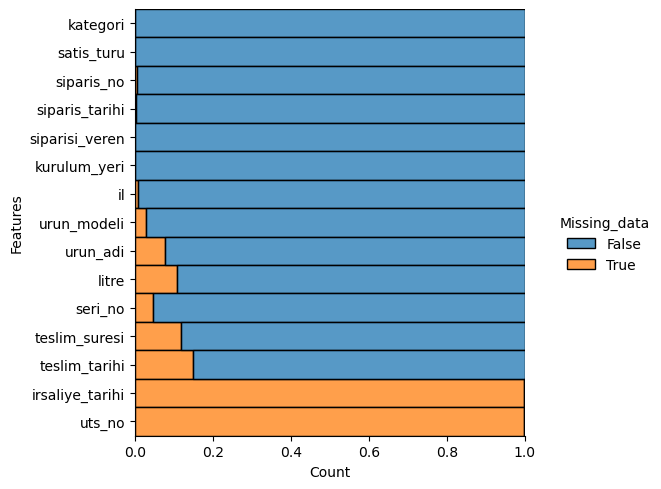

In [17]:
utils.na_ratio_plot()

### Ozet:

1. **Eksik Değerler**: 
   - `irsaliye_tarihi` sütununda çok yüksek bir eksik veri oranı (%99.68) bulunmakta, bu da bu sütunun büyük oranda boş olduğunu gösterir.
   - `uts_no` sütunu da benzer şekilde %99.88 oranında eksik veri içermekte olup yalnızca 3 değer bulunmaktadır. Bu nedenle, `uts_no` sütununun analiz sürecinde sınırlı bir katkısı olabilir.
   - `teslim_tarihi` (%14.96) ve `teslim_suresi` (%11.78) sütunlarında da dikkat çeken eksik veri oranları bulunmaktadır. 
   - `litre` (%10.91) sütunu da önemli bir eksik veri oranına sahiptir.

2. **Veri Dağılımı ve Sıklık**:
   - `kategori` sütununda en sık görülen değer "OTOKLAV" olup, 1242 kez tekrarlanmış ve bu sütunda 6 benzersiz değer bulunmakta.
   - `satis_turu` sütununda en sık görülen değer "YURTDIŞI" olup, 1033 kez tekrarlanmış.
   - `il` sütununda en sık rastlanan değer "İSTANBUL" olarak görünmektedir ve 270 kez geçmektedir.
   - `urun_adi` sütununda 123 farklı benzersiz değer bulunmakta, en sık görülen değer ise "AMELİYAT MASASI" olarak 475 kez geçmektedir.

3. **Sayısal Sütunlar**:
   - `uts_no` sütununda yalnızca 3 adet veri mevcut olup, geri kalanı eksiktir (%99.88 eksik veri). Ayrıca, bu sütundaki tüm dolu değerler aynı olup (`8.697610e+12`), bu nedenle varyans sıfırdır. Bu sütun analize katkı sağlamayabilir ve gerektiğinde çıkarılması düşünülebilir.

4. **Genel Gözlemler**:
   - `irsaliye_tarihi` ve `uts_no` sütunları, yüksek eksik veri oranları nedeniyle analiz açısından dikkatle değerlendirilmelidir. Bu sütunlar analizlerde ihmal edilebilir veya eksik veriler doldurulabilir.
   - `siparis_no`, `siparis_tarihi`, `siparisi_veren`, ve `kurulum_yeri` sütunları nispeten daha az eksik veri içermekte olup veri kalitesi açısından güvenilirdir.
   - `kategori`, `satis_turu` ve `il` gibi kategorik sütunlarda, bazı değerlerin aşırı yoğunlaştığı (örneğin, `YURTDIŞI` ve `İSTANBUL`) gözlemlenmektedir. 

Bu özet, veri setindeki eksik veri oranlarının analiz için önemini ve veri temizliği gerekliliklerini belirlemeye yardımcı olur. Özellikle `uts_no` gibi sabit ve çok eksik veriye sahip sütunların analizde sınırlı katkı sağlayabileceği göz önünde bulundurulmalıdır.

### Features Aciklama:

##### 1. `uts_no` Sütunu
- **Anlamı**: `uts_no`, muhtemelen **Ürün Takip Sistemi** (ÜTS) numarasını temsil eder. ÜTS, sağlık sektöründe veya belirli cihazların izlenmesi için kullanılan bir sistemdir ve her ürüne özel benzersiz bir numara sağlar.
- **Potansiyel Önemi**: Ürünlerin izlenebilirliği açısından önemli bir veri olabilir. ÜTS numaraları, ürünlerin hangi partide üretildiği, hangi dağıtıcıya gönderildiği gibi bilgilere erişim sağlamak için kullanılabilir. Ancak bu veri yalnızca çok spesifik ürünler için geçerli olduğundan, veri setinin büyük kısmında boş kalmış olabilir.
- **Analiz İçin Gerekliliği**: Eğer analiz yalnızca belirli ürünlerin takibini içeriyorsa, bu sütun önemli olabilir. Ancak, veri setinin büyük kısmında bu bilgi eksikse ve ÜTS numarası olmayan ürünlerin analizi yapılacaksa, sütun ihmal edilebilir veya çıkarılabilir.
- **Karar**: Bu sütun %99.88 eksik veri oranına sahip olduğundan, genel analizlerde etkili bir katkı sağlayamayabilir. Belirli bir ÜTS takibi yapılmayacaksa, bu sütun **ignore** edilebilir.

##### 2. `irsaliye_tarihi` Sütunu
- **Anlamı**: `irsaliye_tarihi`, ürünlerin veya hizmetlerin teslimatının yapıldığı tarihin kayıtlı olduğu sütundur. İrsaliye, bir malın alıcıya ulaştığını veya sevkiyatın yapıldığını gösteren resmi bir belgedir ve ticari işlemlerde önemlidir.
- **Potansiyel Önemi**: Teslimat tarihi, lojistik süreçlerin ve zamanında teslim oranlarının analizinde kritik bir faktördür. Teslimat süreçleriyle ilgili analizlerde, zamanında teslim edilip edilmediği, teslim sürelerinin optimize edilmesi gibi durumları incelemek için kullanılabilir.
- **Analiz İçin Gerekliliği**: İrsaliye tarihlerinin eksikliği, teslimat sürecini analiz etmeyi zorlaştırabilir. Eğer lojistik süreçlerin analizi, teslimat sürelerinin değerlendirilmesi veya teslimat performansının ölçülmesi gibi konular analiz için kritik değilse, bu sütun ihmal edilebilir.
- **Karar**: Bu sütun %99.68 eksik veri oranına sahip olduğundan, teslimat süreçleriyle ilgili bir analiz yapılmayacaksa **ignore** edilebilir. Ancak teslimat performansı veya zamanında teslimat oranları analiz edilecekse, eksik verilerin tamamlanması veya doldurulması gerekebilir.

##### 3. `teslim_tarihi` ve `teslim_suresi` Sütunları
- **Anlamları**: `teslim_tarihi`, siparişin müşteriye teslim edildiği tarihi, `teslim_suresi` ise siparişin teslim süresini (gün olarak) ifade eder.
- **Potansiyel Önemi**: Teslimat tarihi ve süresi, müşteri memnuniyeti, sipariş süreçlerinin etkinliği ve lojistik performansı gibi konular için önemlidir. Bu bilgilerle, siparişlerin zamanında teslim edilip edilmediği, teslimat sürelerinin optimize edilmesi gibi analizler yapılabilir.
- **Analiz İçin Gerekliliği**: Eğer müşteri memnuniyeti, lojistik süreçlerin performansı veya zamanında teslim oranları analiz edilecekse, bu sütunlar önemlidir. Ancak ürün bilgisi veya satış gibi süreçler analiz edilecekse, bu sütunların eksikliği analiz sonuçlarını olumsuz etkilemez.
- **Karar**: %10’un üzerinde eksik veri oranına sahip olmalarına rağmen, teslimat süreçleriyle ilgili analiz yapılacaksa eksik veriler tamamlanabilir. Ancak teslimat süreçleri analizin odak noktası değilse, bu sütunlar **ignore** edilebilir.

##### 4. `litre` Sütunu
- Urun adi veya modelde litre bilgisi zaten var!
- **Anlamı**: Bu sütun, ürünlerin miktarını litre cinsinden ifade ediyor olabilir.
- **Potansiyel Önemi**: Litre bilgisi, sıvı bazlı ürünler için önemlidir. Özellikle ürün bazında miktar analizleri, tüketim miktarları veya stok yönetimi gibi konular için bu veri faydalı olabilir.
- **Analiz İçin Gerekliliği**: Eğer stok yönetimi, ürün tüketim miktarı gibi metrikler analiz ediliyorsa litre bilgisi önemlidir. Ancak analizin odak noktası ürün miktarı değilse, bu sütunun eksik olması analiz sonuçlarını etkilemez.
- **Karar**: %10.91 oranında eksik veriye sahip olan `litre` sütunu, miktar veya stok analizleri yapılmayacaksa **ignore** edilebilir.


##### 5. **Diğer Sütunlar**:
   - **Önemli Eksik Veri İçermeyen Sütunlar**: `kategori`, `satis_turu`, `siparis_no`, `siparis_tarihi`, `siparisi_veren`, `kurulum_yeri`, `il`, `urun_modeli`, ve `urun_adi` sütunları nispeten düşük eksik veri oranlarına sahiptir ve genel analizler için güvenilir sayılabilir.
   - **Analiz İçin Gerekliliği**: Bu sütunlar sipariş bilgileri, müşteri bilgileri ve ürün özellikleri gibi temel verileri içerdiğinden, genel analizlerde kullanılmaları faydalı olacaktır.

---

##### Genel Değerlendirme ve Öneri:
- **Ignore Edilebilecek Sütunlar**: `uts_no` ve `irsaliye_tarihi`, yüksek eksik veri oranları nedeniyle genel analizlerde ihmal edilebilir.
- **Kısmi Kullanılabilir Sütunlar**: `teslim_tarihi`, `teslim_suresi`, ve `litre` sütunları, yalnızca ilgili analizler (teslimat veya stok analizi) yapılacaksa eksik verilerle dikkate alınabilir veya tamamlanabilir.
- **Önemli Sütunlar**: Sipariş, ürün, müşteri ve lokasyon bilgileri içeren diğer sütunlar genel analizlerde güvenle kullanılabilir.


Analiz amacı, müşteri memnuniyeti, lojistik süreçler, miktar bazlı ürün analizi gibi alanları içermiyorsa, bu sütunların bir kısmını **ignore etmek** analiz sürecini daha verimli hale getirebilir.

## Kategorilere gore inceleme:

In [19]:
# Kategorilere gore secili sutunlardaki toplam VALUE sayisi:

utils.groupby_get_values() # siparis_tarihi,teslim_suresi,teslim_tarihi,irsaliye_tarihi

Mevcut sütunlar:
kategori | satis_turu | siparis_no | siparis_tarihi | siparisi_veren | kurulum_yeri | il | urun_modeli | urun_adi | litre | seri_no | teslim_suresi | teslim_tarihi | irsaliye_tarihi | uts_no

Lütfen groupby yapılacak sütunu seçiniz (örneğin: kategori, teslim_tarihi vb.): kategori

Değerlerini görmek istediğiniz diğer sütunları virgülle ayırarak giriniz (örneğin: fiyat, adet, tarih): siparis_tarihi,teslim_suresi,teslim_tarihi,irsaliye_tarihi

# Gruplandırılmış DataFrame (Dolu Değerler):



,kategori,siparis_tarihi,teslim_suresi,teslim_tarihi,irsaliye_tarihi
0,AMELIYAT MASASI,475,423,408,0
1,HIDROJEN PEROKSIT,134,135,126,2
2,OKSIJEN,70,43,65,0
3,OTOKLAV,1242,1047,982,6
4,REVERSE OSMOS,199,192,190,0
5,YIKAMA,393,383,372,0


In [34]:
# Kategorilere gore secili sutunlardaki toplam NULL sayisi:

utils.groupby_get_null_values() # #siparis_tarihi,teslim_suresi,teslim_tarihi,irsaliye_tarihi

Mevcut sütunlar:
kategori | satis_turu | siparis_no | siparis_tarihi | siparisi_veren | kurulum_yeri | il | urun_modeli | urun_adi | litre | seri_no | teslim_suresi | teslim_tarihi | irsaliye_tarihi | aciklama | solusyon_fatura | bidon_acilisi | uts_no

Lütfen index olarak kullanılacak sütunu seçiniz (örneğin: kategori, teslim_tarihi vb.): kategori

Null değerlerini görmek istediğiniz diğer sütunları virgülle ayırarak giriniz (örneğin: fiyat, adet, tarih): siparis_tarihi,teslim_suresi,teslim_tarihi,irsaliye_tarihi

# Gruplandırılmış DataFrame (Null Değerler):



,kategori,siparis_tarihi,teslim_suresi,teslim_tarihi,irsaliye_tarihi
0,AMELIYAT MASASI,0,52,67,475
1,HIDROJEN PEROKSIT,1,0,9,133
2,KARTUS,1809,30126,30123,30126
3,OKSIJEN,1,28,6,71
4,OTOKLAV,0,195,260,1236
5,REVERSE OSMOS,5,12,14,204
6,YIKAMA,0,10,21,393


## df_dates  (Tarih sutunlari)

In [38]:
# Secilen sütunları ile yeni bir DataFrame oluşturma

date_columns = df_filtered[["siparis_tarihi", "teslim_suresi", "teslim_tarihi", "irsaliye_tarihi"]]

# date_columns DataFrame'ini CSV olarak kaydetme
date_columns.to_csv('date_columns.csv', index=False)

print(date_columns.shape)
date_columns.head()

(2520, 4)


,siparis_tarihi,teslim_suresi,teslim_tarihi,irsaliye_tarihi
0,6/29/2018,20 GÜN,7/18/2018,NaN
1,2/14/2018,21 GÜN,NaN,NaN
2,10/23/2018,DERHAL,NaN,NaN
3,9/3/2018,7 GÜN,9/7/2018,NaN
4,2/28/2018,8 GÜN,NaN,NaN


In [25]:
#========= read as CSV ================

df_dates = pd.read_csv('date_columns.csv')

print(df_dates.shape)
df_dates.head()

(2520, 4)


,siparis_tarihi,teslim_suresi,teslim_tarihi,irsaliye_tarihi
0,6/29/2018,20 GÜN,7/18/2018,NaN
1,2/14/2018,21 GÜN,NaN,NaN
2,10/23/2018,DERHAL,NaN,NaN
3,9/3/2018,7 GÜN,9/7/2018,NaN
4,2/28/2018,8 GÜN,NaN,NaN


In [41]:
utils.df = df_dates  # utils uzerinde fonk uygula

In [42]:
utils.missing_values()

Eksik değerlerin sütun bazında dökümü aşağıda verilmiştir:


,Eksik Değer Sayısı,Yüzde
siparis_tarihi,7,0.28%
teslim_suresi,297,11.79%
teslim_tarihi,377,14.96%
irsaliye_tarihi,2512,99.68%


## Data Cleaning and Transformation

In [ ]:
# df_all         # df_all -with Kartus==> Kullanilmayacak (sadece kontrol icin bakilabilir)
# df_filtered    # df -without Kartus
# df_kartus      # df -only Kartus

# df_dates       # tarih sutunlarindan olsuturdugumuz df

### Genel Data Cleaning (df_filtered: noKartus)

In [53]:
df_filtered[df_filtered['siparis_no'].isnull()
            & df_filtered['siparisi_veren'].isnull()
            & df_filtered['siparis_tarihi'].isnull()]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
2450,OKSIJEN,YURTDIŞI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- 2450 indexli satır tamamen BOS olduğu için filtrelenecektir (sadece satis_turu degeri var!!!!)

In [54]:
# 1.Update:  df_filtered - 2450. index ignore edildi

df_filtered = df_filtered[(df_filtered['siparis_no'].notnull()) | 
              (df_filtered['siparisi_veren'].notnull()) | 
              (df_filtered['siparis_tarihi'].notnull())]

### **siparis_tarihi**

In [45]:
utils.get_value_count()

Mevcut sütunlar:
siparis_tarihi | teslim_suresi | teslim_tarihi | irsaliye_tarihi

Lütfen değerlerini görmek istediğiniz sütun adını yazınız (örn: 'siparis_tarihi'):
Sütun adı: siparis_tarihi


,siparis_tarihi,counts,percent
0,11/12/2020 0:00,60,2.39%
1,9/19/2018,47,1.87%
2,6/4/2020 0:00,43,1.71%
3,4/29/2020,40,1.59%
4,11/2/2022,37,1.47%
5,3/13/2021,34,1.35%
6,1/6/2022,31,1.23%
7,12/17/2019 0:00,25,0.99%
8,5/2/2023,21,0.84%
9,6/16/2023,16,0.64%


In [26]:
# Anormal degerler: siparis_tarihi
utils.df = df_all # tum anormal degerleri gormek icin+kartus dahil tum dataya bakildi

utils.find_non_numeric_values() 

Mevcut sütunlar:
kategori | satis_turu | siparis_no | siparis_tarihi | siparisi_veren | kurulum_yeri | il | urun_modeli | urun_adi | litre | seri_no | teslim_suresi | teslim_tarihi | irsaliye_tarihi | aciklama | solusyon_fatura | bidon_acilisi | uts_no

Lütfen analiz etmek istediğiniz sütun adını yazınız (örn: 'siparis_no'):
Sütun adı: siparis_tarihi
'siparis_tarihi' sütununda bulunan benzersiz sayısal olmayan değerler:


{' ', ' . ', ' AKSARAY ', ' DMO ', '.', '/', ':'}

#### Missings:

`siparis_tarihi` sütunundaki `null` değerlerin doldurulmasında, diğer sütunlarla ilişkisini şu şekilde değerlendirebiliriz:

1. **`siparis_no`**: **En güçlü ilişki**. Aynı sipariş numarası, aynı sipariş tarihini yansıtmalıdır. Eksik değerleri doldururken ilk olarak aynı sipariş numarasına sahip satırlardaki `siparis_tarihi` kullanılabilir.

2. **`satis_turu`**: Satış türü (örneğin, "ÖZEL", "DEĞİŞİM") sipariş tarihini etkileyebilir. Değişim gibi durumlarda orijinal tarihten farklı bir tarih olabilir, dolayısıyla ilişki doğrudan değildir ancak farklı türlerdeki tarihleri karşılaştırmak için bir referans olarak kullanılabilir.

3. **`siparisi_veren` ve `kurulum_yeri`**: Aynı müşterinin (siparişi veren) ve aynı kurulum yeri olan siparişler, benzer tarihlerde yapılmış olabilir. Aynı `siparisi_veren` ve `kurulum_yeri` kombinasyonuna sahip siparişlerde tarih tahmin edilebilir.

4. **`teslim_suresi` ve `teslim_tarihi`**: Sipariş tarihini dolaylı olarak tahmin etmeye yardımcı olabilir. Eğer `teslim_tarihi` doluysa, `teslim_suresi` kullanılarak sipariş tarihi yaklaşık olarak hesaplanabilir (`teslim_tarihi - teslim_suresi`).

5. **`irsaliye_tarihi`**: İrsaliye tarihi varsa, bu tarih siparişin yakın bir zaman diliminde gerçekleştiğini gösterebilir. İrsaliye tarihine göre sipariş tarihi tahmin edilebilir.

6. **`kategori`, `urun_modeli`, `urun_adi`, `litre` ve `seri_no`**: Sipariş tarihiyle doğrudan bağlantılı değillerdir, ancak aynı ürünü veya kategoriyi içeren siparişler arasında belirli bir dönemsel düzen varsa, tahmin için yardımcı olabilir.

**Sonuç**: `siparis_no`, `teslim_tarihi` ve `teslim_suresi`, `siparisi_veren`, `kurulum_yeri` gibi sütunlar en yüksek etkiye sahip. `irsaliye_tarihi` dolaylı olarak kullanılabilir. Bu sütunlar, eksik `siparis_tarihi` değerlerini tahmin etmek için en mantıklı referanslardır.

In [56]:
# MISSING VALUES

df_filtered[df_filtered['siparis_tarihi'].isnull()] # ' ' bos string null olark gelmedi

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
1728,HIDROJEN PEROKSIT,DMO-YÜKSELİŞ,2018/171,NaN,DMO İZMİR BÖLGE MÜDÜRLÜĞÜ,MERKEZ EFENDİ DEVLET HASTANESİ,manisa,TKF 120,120 LT ÇİFT KAPI PLAZMA CİHAZI,120 LT,2018/04-004,62 GÜN,NaN,NaN,NaN
1852,REVERSE OSMOS,ÖZEL,NaN,NaN,BEZMİALEM VAKIF ÜNİVERSİTESİ,BEZMİALEM VAKIF ÜNİVERSİTESİ,İSTANBUL,PREMİUM 240,NaN,500 LT,2018/08-001,NaN,NaN,NaN,NaN
1853,REVERSE OSMOS,ÖZEL,NaN,NaN,BÜYÜKÇEKMECE DEVLET HASTANESİ,BÜYÜKÇEKMECE DEVLET HASTANESİ,İSTANBUL,PREMİUM 440,NaN,1000 LT,2018/08-002,NaN,NaN,NaN,NaN
1854,REVERSE OSMOS,NaN,NaN,NaN,FOÇA DEVLET HASTANESİ,FOÇA DEVLET HASTANESİ,İZMİR,PREMİUM 240,NaN,500 LT,2018/08-003,NaN,NaN,NaN,NaN
1855,REVERSE OSMOS,NaN,NaN,NaN,Gemlik Devlet Hastanesi,Gemlik Devlet Hastanesi,bursa,PREMİUM 440,NaN,1000 LT,2018/08-004,NaN,NaN,NaN,NaN
1876,REVERSE OSMOS,NaN,NaN,NaN,ANKARA ÜNİVERSİTESİ,ANKARA ÜNİVERSİTESİ,ANKARA,PREMIUM 340,NaN,750 LT,2019/08-011,NaN,4.01.2020,NaN,NaN


#### ['siparis_no'] == '2018/171']

In [31]:
df_filtered[df_filtered['siparis_no'] == '2018/171']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
512,OTOKLAV,DMO,2018/171,6/12/2018,DMO GENEL MÜDÜRLÜĞÜ,KEÇİÖREN EĞİTİM VE ARAŞTIRMA HASTANESİ,ANKARA,ERS 6613 S,550 LT TEK KALIPI OTOKLAV CİHAZI,550 LT,2018/01-038,54 GÜN,NaN,NaN,NaN
1728,HIDROJEN PEROKSIT,DMO-YÜKSELİŞ,2018/171,NaN,DMO İZMİR BÖLGE MÜDÜRLÜĞÜ,MERKEZ EFENDİ DEVLET HASTANESİ,manisa,TKF 120,120 LT ÇİFT KAPI PLAZMA CİHAZI,120 LT,2018/04-004,62 GÜN,NaN,NaN,NaN


- Buna dayanarak, **aynı `siparis_no` ve benzer `seri_no`** (2018 ile başlaması) değerlerine sahip olduklarından, DMO-YÜKSELİŞ'te `siparis_tarihi` olarak **6/12/2018** tarihini kullanmak mantıklı olabilir. 
- Bu şekilde, `seri_no` ile de bu tarihin yaklasik doğru olabileceği desteklenir.

In [32]:
# 'siparis_no' değeri '2018/171' olan ve 'siparis_tarihi' boş olan satırlara 6/12/2018 tarihini atama
df_filtered.loc[(df_filtered['siparis_no'] == '2018/171') &
                (df_filtered['siparis_tarihi'].isna()),
                'siparis_tarihi'] = '2018-06-12'

# Değişiklikleri kontrol etmek için
df_filtered[df_filtered['siparis_no'] == '2018/171']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
512,OTOKLAV,DMO,2018/171,6/12/2018,DMO GENEL MÜDÜRLÜĞÜ,KEÇİÖREN EĞİTİM VE ARAŞTIRMA HASTANESİ,ANKARA,ERS 6613 S,550 LT TEK KALIPI OTOKLAV CİHAZI,550 LT,2018/01-038,54 GÜN,NaN,NaN,NaN
1728,HIDROJEN PEROKSIT,DMO-YÜKSELİŞ,2018/171,2018-06-12,DMO İZMİR BÖLGE MÜDÜRLÜĞÜ,MERKEZ EFENDİ DEVLET HASTANESİ,manisa,TKF 120,120 LT ÇİFT KAPI PLAZMA CİHAZI,120 LT,2018/04-004,62 GÜN,NaN,NaN,NaN


#### ['siparis_no'] == '2020/080']

In [57]:
df_filtered[df_filtered['siparis_no'] == '2020/080'] # ' ' bos string null olark gormedi

# siparis_tarih sutunu formatladiktan sonra bos string OTOKLAV daki-> None deger goruluyor 

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
764,OTOKLAV,ÖZEL,2020/080,.,ANADOLU BİRLİK HOLDİNG A.Ş.,ÇUMRA ŞEKER ENTEGRE TESİSLERİ,KONYA,STR 6610 S,422 LT TEK KAYAR KAPILI OTOKLAV CİHAZI,422 LT,2020/01-043,NaN,3/19/2020 0:00,NaN,NaN


In [58]:
# kartus'tan bilgi bulabilirmiyiz diye df All bakildi

df_all[df_all['siparis_no'] == '2020/080']  
# kurum - cihaz - satis turu FARKLI?

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
764,OTOKLAV,ÖZEL,2020/080,.,ANADOLU BİRLİK HOLDİNG A.Ş.,ÇUMRA ŞEKER ENTEGRE TESİSLERİ,KONYA,STR 6610 S,422 LT TEK KAYAR KAPILI OTOKLAV CİHAZI,422 LT,2020/01-043,NaN,3/19/2020 0:00,NaN,NaN,NaN,NaN,NaN
7450,KARTUS,DEĞİŞİM,2020/080,6/20/2020,BANDIRMA DEVLET HASTANESİ,NaN,BALIKESİR,NaN,KARTUŞ,NaN,2020/07-1189,NaN,NaN,NaN,DEĞİŞİM,20.12.2019-GIB2019000016266,1/5/2020,NaN
7451,KARTUS,DEĞİŞİM,2020/080,6/20/2020,BANDIRMA DEVLET HASTANESİ,NaN,BALIKESİR,NaN,KARTUŞ,NaN,2020/07-1190,NaN,NaN,NaN,DEĞİŞİM,20.12.2019-GIB2019000016266,1/5/2020,NaN
7452,KARTUS,DEĞİŞİM,2020/080,6/20/2020,BANDIRMA DEVLET HASTANESİ,NaN,BALIKESİR,NaN,KARTUŞ,NaN,2020/07-1191,NaN,NaN,NaN,DEĞİŞİM,20.12.2019-GIB2019000016266,1/5/2020,NaN
7453,KARTUS,DEĞİŞİM,2020/080,6/20/2020,BANDIRMA DEVLET HASTANESİ,NaN,BALIKESİR,NaN,KARTUŞ,NaN,2020/07-1192,NaN,NaN,NaN,DEĞİŞİM,20.12.2019-GIB2019000016266,1/5/2020,NaN
7454,KARTUS,DEĞİŞİM,2020/080,6/20/2020,BANDIRMA DEVLET HASTANESİ,NaN,BALIKESİR,NaN,KARTUŞ,NaN,2020/07-1193,NaN,NaN,NaN,DEĞİŞİM,20.12.2019-GIB2019000016266,1/5/2020,NaN
7455,KARTUS,DEĞİŞİM,2020/080,6/20/2020,BANDIRMA DEVLET HASTANESİ,NaN,BALIKESİR,NaN,KARTUŞ,NaN,2020/07-1194,NaN,NaN,NaN,DEĞİŞİM,20.12.2019-GIB2019000016266,1/5/2020,NaN
7456,KARTUS,DEĞİŞİM,2020/080,6/20/2020,BANDIRMA DEVLET HASTANESİ,NaN,BALIKESİR,NaN,KARTUŞ,NaN,2020/07-1195,NaN,NaN,NaN,DEĞİŞİM,20.12.2019-GIB2019000016266,1/5/2020,NaN
7457,KARTUS,DEĞİŞİM,2020/080,6/20/2020,BANDIRMA DEVLET HASTANESİ,NaN,BALIKESİR,NaN,KARTUŞ,NaN,2020/07-1196,NaN,NaN,NaN,DEĞİŞİM,20.12.2019-GIB2019000016266,1/5/2020,NaN
7458,KARTUS,DEĞİŞİM,2020/080,6/20/2020,BANDIRMA DEVLET HASTANESİ,NaN,BALIKESİR,NaN,KARTUŞ,NaN,2020/07-1197,NaN,NaN,NaN,DEĞİŞİM,20.12.2019-GIB2019000016266,1/5/2020,NaN


Genel olarak, aynı `siparis_no` (sipariş numarası) değerine sahip satırlarda **sipariş tarihinin de aynı olması beklenir**. Çünkü sipariş numarası, genellikle belirli bir siparişi benzersiz olarak tanımlar ve bu siparişin belirli bir tarihte verildiğini ifade eder. Ancak bazı durumlarda, aynı sipariş numarası için farklı tarihler aşağıdaki nedenlerle ortaya çıkabilir:

1. **Değişim veya Güncelleme**: Bir ürün veya hizmetin yeniden teslim edilmesi, değiştirilmesi veya güncellenmesi durumunda, aynı sipariş numarası korunarak yeni bir sipariş tarihi atanabilir. Bu tür durumlar, ikinci satırdaki gibi `DEĞİŞİM` olarak işaretlenmiş satış türlerinde gözlenebilir.

2. **Yanlış Veri Girişi**: Aynı sipariş numarasına sahip satırlar, yanlış veri girişi veya kayıtlardaki hatalar nedeniyle farklı tarihlerle kaydedilmiş olabilir.

3. **Manuel Düzenlemeler**: Sipariş tarihleri üzerinde manuel düzenlemeler yapılmışsa, orijinal tarihin dışında bir tarih girilmiş olabilir.

- > Genel kurala göre, aynı `siparis_no` değerine sahip satırların `siparis_tarihi` değerleri de aynı olmalıdır. Ancak değişim veya güncelleme gibi özel durumlarda bu tarihlerin farklı olması mümkündür. Eğer farklı tarih bilgisi varsa, bu kayıtların anlamını ve bağlamını göz önünde bulundurarak doğruluklarını kontrol etmek yararlı olacaktır.

##### Otoklav teslim_suresi ort gore doldurma? Check!

In [66]:
df_filtered[(df_filtered['kategori'] == 'OTOKLAV') &
            (df_filtered['urun_modeli'] == 'STR 6610 S') &
            (df_filtered['urun_adi'] == '422 LT TEK KAYAR KAPILI OTOKLAV CİHAZI')]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
690,OTOKLAV,YURTDIŞI,2019/251,11/12/2019,JCA SOLUCİONES,JCA SOLUCİONES,EKVATOR,STR 6610 S,422 LT TEK KAYAR KAPILI OTOKLAV CİHAZI,422LT,2019/01-081,19,NaN,NaN,NaN
764,OTOKLAV,ÖZEL,2020/080,.,ANADOLU BİRLİK HOLDİNG A.Ş.,ÇUMRA ŞEKER ENTEGRE TESİSLERİ,KONYA,STR 6610 S,422 LT TEK KAYAR KAPILI OTOKLAV CİHAZI,422 LT,2020/01-043,NaN,3/19/2020 0:00,NaN,NaN


- YURTICI - YURTDISI farkli
- Siparis_no farkli
- seri_no yani uretim numaralari da farkli
- teslim suresi YURTDISI 19 gun yurticinde daha kisa olabilir
- ==> bu filtreye gore gelen degerle doldurmak uygun olmayabilir mi?

In [ ]:
# # Belirtilen filtrelere uygun verileri seçme
# filtered_df = df[
#     (df['kategori'] == 'OTOKLAV') &
#     (df['urun_modeli'] == 'STR 6610 S') &
#     (df['urun_adi'] == '422 LT TEK KAYAR KAPILI OTOKLAV CİHAZI')
# ]

# # 'teslim_suresi' sütununu sayısal formata çevirme ve ortalama hesaplama
# avg_teslim_suresi = pd.to_numeric(filtered_df['teslim_suresi'], errors='coerce').mean()

# print(f"Ortalama Teslim Süresi: {avg_teslim_suresi:.2f} gün")

 `siparis_no` ile `siparis_tarihi` arasındaki ilişkiye göre eksik `siparis_tarihi` değerini doldurmak için şu önerileri dikkate alabilirsiniz:

1. **Aynı `kategori` ve `siparis_no` Benzerliği**:
   - `kategori` sütununda her iki satırda da **"OTOKLAV"** değeri mevcut ve `siparis_no` değerleri **"2019/251"** ve **"2020/080"** olarak iki farklı sipariş numarası.
   - Eğer belirli bir yıl veya sipariş numarası formatı sıralı bir düzen izliyorsa, eksik olan `siparis_tarihi`  **önceki siparişin yılını** (örneğin, **2020** gibi) temel alarak tahmin edilebilir. Ancak, bu her zaman doğru olmayabilir, bu nedenle dikkatle uygulanmalıdır.

2. **Diğer Benzer Siparişleri İnceleme**:
   - `siparis_no` değeri "2020/080" olan başka siparişler varsa ve onların `siparis_tarihi` doluysa, eksik olan `siparis_tarihi` bu kayıtlar referans alınarak doldurulabilir.
   - Eğer bu sipariş numarası daha önce bir tarihte geçmişse, tahmini olarak bu tarih aynı yıl içindeki bir gün olabilir.

3. **Daha Fazla Veri ile Eksik Değer Tahmini**:
   - `siparis_tarihi` dolu olan diğer benzer siparişleri içeren bir veri seti varsa, "2020/080" numarasına en yakın olan tarihi göz önünde bulundurarak eksik tarihi tamamlamak mümkün olabilir.
   
4. **Belirsizlik Durumu**:
   - Eğer `siparis_no` ve `kategori` dışında eksik tarihi tahmin etmek için başka bir gösterge yoksa, eksik değeri doldurmak yerine olduğu gibi `null` olarak bırakmak, analiz için daha güvenilir olabilir.

##### Önerilen Yöntem:
- **Aynı sipariş numarasına sahip dolu bir tarih yoksa**, `siparis_tarihi` eksik bırakılması, yani olduğu gibi kalması en güvenilir çözüm olabilir.
- **Alternatif olarak**: Eğer yıl bazında tahmin yapmanız gerekiyorsa, aynı yıl içinde başka bir `siparis_no`'nun tarihine bakarak ortalama veya en yaygın kullanılan bir tarih ile doldurabilirsiniz. 

Bu yöntemler ışığında, eksik veriyi tahmin etmek dikkat gerektirdiğinden yalnızca yeterli veri varsa bu tahmin yapılmalıdır; aksi takdirde eksik değer korunmalıdır.

In [33]:
df_all[df_all['siparis_no'] == '2020/080']  

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
764,OTOKLAV,ÖZEL,2020/080,.,ANADOLU BİRLİK HOLDİNG A.Ş.,ÇUMRA ŞEKER ENTEGRE TESİSLERİ,KONYA,STR 6610 S,422 LT TEK KAYAR KAPILI OTOKLAV CİHAZI,422 LT,2020/01-043,NaN,3/19/2020 0:00,NaN,NaN,NaN,NaN,NaN
7450,KARTUS,DEĞİŞİM,2020/080,6/20/2020,BANDIRMA DEVLET HASTANESİ,NaN,BALIKESİR,NaN,KARTUŞ,NaN,2020/07-1189,NaN,NaN,NaN,DEĞİŞİM,20.12.2019-GIB2019000016266,1/5/2020,NaN
7451,KARTUS,DEĞİŞİM,2020/080,6/20/2020,BANDIRMA DEVLET HASTANESİ,NaN,BALIKESİR,NaN,KARTUŞ,NaN,2020/07-1190,NaN,NaN,NaN,DEĞİŞİM,20.12.2019-GIB2019000016266,1/5/2020,NaN
7452,KARTUS,DEĞİŞİM,2020/080,6/20/2020,BANDIRMA DEVLET HASTANESİ,NaN,BALIKESİR,NaN,KARTUŞ,NaN,2020/07-1191,NaN,NaN,NaN,DEĞİŞİM,20.12.2019-GIB2019000016266,1/5/2020,NaN
7453,KARTUS,DEĞİŞİM,2020/080,6/20/2020,BANDIRMA DEVLET HASTANESİ,NaN,BALIKESİR,NaN,KARTUŞ,NaN,2020/07-1192,NaN,NaN,NaN,DEĞİŞİM,20.12.2019-GIB2019000016266,1/5/2020,NaN
7454,KARTUS,DEĞİŞİM,2020/080,6/20/2020,BANDIRMA DEVLET HASTANESİ,NaN,BALIKESİR,NaN,KARTUŞ,NaN,2020/07-1193,NaN,NaN,NaN,DEĞİŞİM,20.12.2019-GIB2019000016266,1/5/2020,NaN
7455,KARTUS,DEĞİŞİM,2020/080,6/20/2020,BANDIRMA DEVLET HASTANESİ,NaN,BALIKESİR,NaN,KARTUŞ,NaN,2020/07-1194,NaN,NaN,NaN,DEĞİŞİM,20.12.2019-GIB2019000016266,1/5/2020,NaN
7456,KARTUS,DEĞİŞİM,2020/080,6/20/2020,BANDIRMA DEVLET HASTANESİ,NaN,BALIKESİR,NaN,KARTUŞ,NaN,2020/07-1195,NaN,NaN,NaN,DEĞİŞİM,20.12.2019-GIB2019000016266,1/5/2020,NaN
7457,KARTUS,DEĞİŞİM,2020/080,6/20/2020,BANDIRMA DEVLET HASTANESİ,NaN,BALIKESİR,NaN,KARTUŞ,NaN,2020/07-1196,NaN,NaN,NaN,DEĞİŞİM,20.12.2019-GIB2019000016266,1/5/2020,NaN
7458,KARTUS,DEĞİŞİM,2020/080,6/20/2020,BANDIRMA DEVLET HASTANESİ,NaN,BALIKESİR,NaN,KARTUŞ,NaN,2020/07-1197,NaN,NaN,NaN,DEĞİŞİM,20.12.2019-GIB2019000016266,1/5/2020,NaN


In [45]:
df_filtered[
            #(df_filtered['kategori'] == 'OTOKLAV') &
            (df_filtered['satis_turu'] == 'ÖZEL') #&
            #(df_filtered['teslim_tarihi'] == '3/19/2020 0:00')
            ]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
0,AMELIYAT MASASI,ÖZEL,2018/006,6/29/2018,ÖZEL FSM TIP MERKEZİ,ÖZEL FSM TIP MERKEZİ,İSTANBUL,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-012,20 GÜN,7/18/2018,NaN,NaN
2,AMELIYAT MASASI,ÖZEL,2018/008,10/23/2018,İZMİR KATİP ÇELEBİ ÜNİVERSİTESİ,İZMİR KATİP ÇELEBİ ÜNİVERSİTESİ,İZMİR,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-029,DERHAL,NaN,NaN,NaN
6,AMELIYAT MASASI,ÖZEL,2018/015,7/27/2018,İZMİR KATİP ÇELEBİ ÜNİVERSİTESİ,İZMİR KATİP ÇELEBİ ÜNİVERSİTESİ,İZMİR,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-016,61 GÜN,8/6/2018,NaN,NaN
8,AMELIYAT MASASI,ÖZEL,2018/017,6/29/2018,ÖZEL FSM TIP MERKEZİ,ÖZEL FSM TIP MERKEZİ,İSTANBUL,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-011,20 GÜN,7/18/2018,NaN,NaN
13,AMELIYAT MASASI,ÖZEL,2018/023,4/11/2018,ÖZEL,ÖZEL SAFA TEŞHİS VE TEDAVİ MERKEZİ SAN.TİC.A.Ş.,İZMİR,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-005,DERHAL,NaN,NaN,NaN
20,AMELIYAT MASASI,ÖZEL,2018/034,1/2/2018,DED GRUP İNŞAAT MEDİKAL SANAYİ VE TİCARET LİMİ...,MALATYA DEVLET HASTANESİ,MALATYA,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-001,31 GÜN,NaN,NaN,NaN
24,AMELIYAT MASASI,ÖZEL,2018/145,6/29/2018,ÖZEL FSM TIP MERKEZİ,ÖZEL FSM TIP MERKEZİ,İSTANBUL,STR 2000 F,AMELİYAT MASASI,*,2018/02-013,20 GÜN,7/18/2018,NaN,NaN
25,AMELIYAT MASASI,ÖZEL,2018/146,4/30/2018,ÖZTAN HASTANESİ,ÖZTAN HASTANESİ,UŞAK,2000 F,AMELİYAT MASASI,*,2018/02-006,NaN,5/10/2018 0:00,NaN,NaN
29,AMELIYAT MASASI,ÖZEL,2018/167,5/18/2018,GÜVEN HASTANESİ,GÜVEN HASTANESİ,ANKARA,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-007,51 GÜN,5/28/2018,NaN,NaN
41,AMELIYAT MASASI,ÖZEL,2019/004,1/22/2019,İNCİRLİ SAĞLIK VE SOSYAL TESİSLERİ A.Ş.,ETİCA HASTANESİ,İSTANBUL,STR 2000 F,AMELİYAT MASASI,*,2019/02-001,3,1/25/2019 0:00,NaN,NaN


- 2020 yilinda yapilan OTOKLAV siparislerinin tamami ayni tarihte olusturulmus
- seri_no: uretim yil/sayi da tutarli gorunuyor

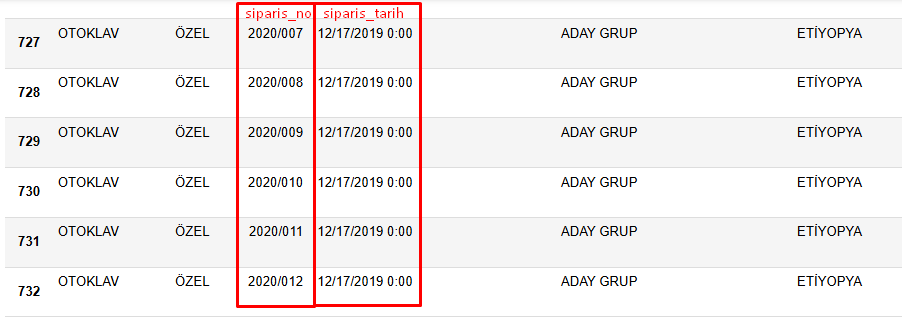
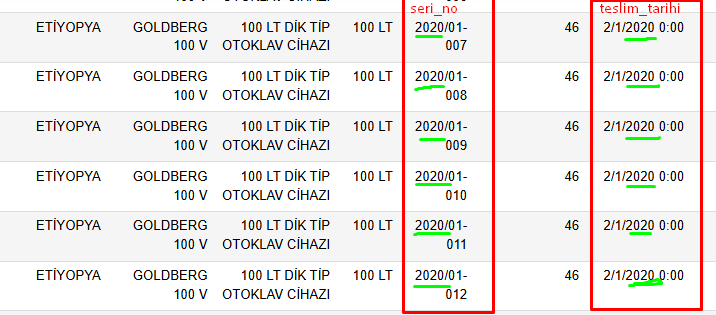

In [48]:
# 'kategori' sütunu 'OTOKLAV' olan ve 'siparis_tarihi' sütununda '2020' içeren satırları filtreleme
df_filtered[
            (df_filtered['kategori'] == 'OTOKLAV')
            & df_filtered['siparis_no'].str.contains('2020', na=False, case=False)
           ]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,uts_no
721,OTOKLAV,ÖZEL,2020/001,12/17/2019 0:00,ADAY GRUP,ETİYOPYA,ETİYOPYA,GOLDBERG 100 V,100 LT DİK TİP OTOKLAV CİHAZI,100 LT,2020/01-001,46,2/1/2020 0:00,NaN,NaN
722,OTOKLAV,ÖZEL,2020/002,12/17/2019 0:00,ADAY GRUP,ETİYOPYA,ETİYOPYA,GOLDBERG 100 V,100 LT DİK TİP OTOKLAV CİHAZI,100 LT,2020/01-002,46,2/1/2020 0:00,NaN,NaN
723,OTOKLAV,ÖZEL,2020/003,12/17/2019 0:00,ADAY GRUP,ETİYOPYA,ETİYOPYA,GOLDBERG 100 V,100 LT DİK TİP OTOKLAV CİHAZI,100 LT,2020/01-003,46,2/1/2020 0:00,NaN,NaN
724,OTOKLAV,ÖZEL,2020/004,12/17/2019 0:00,ADAY GRUP,ETİYOPYA,ETİYOPYA,GOLDBERG 100 V,100 LT DİK TİP OTOKLAV CİHAZI,100 LT,2020/01-004,46,2/1/2020 0:00,NaN,NaN
725,OTOKLAV,ÖZEL,2020/005,12/17/2019 0:00,ADAY GRUP,ETİYOPYA,ETİYOPYA,GOLDBERG 100 V,100 LT DİK TİP OTOKLAV CİHAZI,100 LT,2020/01-005,46,2/1/2020 0:00,NaN,NaN
726,OTOKLAV,ÖZEL,2020/006,12/17/2019 0:00,ADAY GRUP,ETİYOPYA,ETİYOPYA,GOLDBERG 100 V,100 LT DİK TİP OTOKLAV CİHAZI,100 LT,2020/01-006,46,2/1/2020 0:00,NaN,NaN
727,OTOKLAV,ÖZEL,2020/007,12/17/2019 0:00,ADAY GRUP,ETİYOPYA,ETİYOPYA,GOLDBERG 100 V,100 LT DİK TİP OTOKLAV CİHAZI,100 LT,2020/01-007,46,2/1/2020 0:00,NaN,NaN
728,OTOKLAV,ÖZEL,2020/008,12/17/2019 0:00,ADAY GRUP,ETİYOPYA,ETİYOPYA,GOLDBERG 100 V,100 LT DİK TİP OTOKLAV CİHAZI,100 LT,2020/01-008,46,2/1/2020 0:00,NaN,NaN
729,OTOKLAV,ÖZEL,2020/009,12/17/2019 0:00,ADAY GRUP,ETİYOPYA,ETİYOPYA,GOLDBERG 100 V,100 LT DİK TİP OTOKLAV CİHAZI,100 LT,2020/01-009,46,2/1/2020 0:00,NaN,NaN
730,OTOKLAV,ÖZEL,2020/010,12/17/2019 0:00,ADAY GRUP,ETİYOPYA,ETİYOPYA,GOLDBERG 100 V,100 LT DİK TİP OTOKLAV CİHAZI,100 LT,2020/01-010,46,2/1/2020 0:00,NaN,NaN


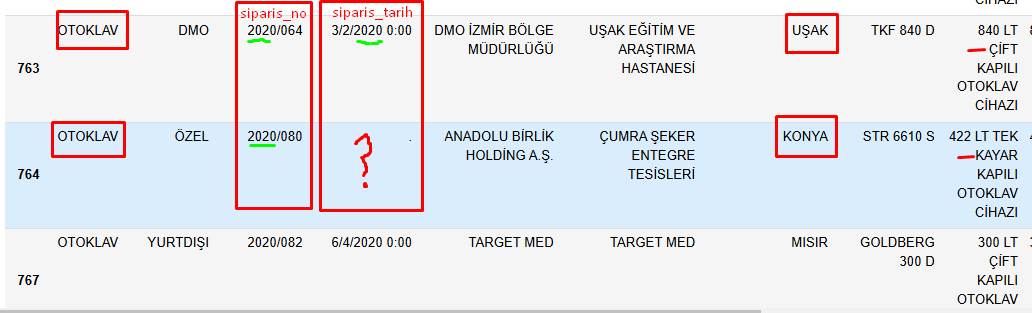
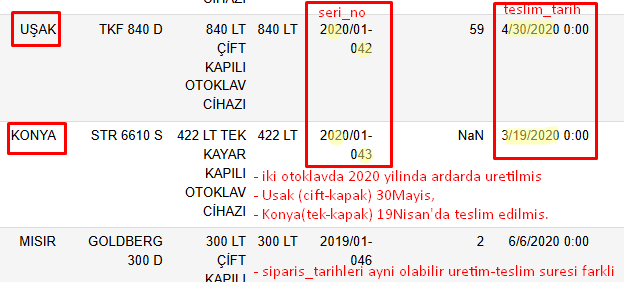

#### AKSARAY (in Kartus)

In [27]:
df_all[df_all['siparis_tarihi'] == 'AKSARAY'] 


# KARTUS daha once uretilmis, stok urun
# hatali giris, AKSARAY ==># ALYANS MEDİKAL TİC.LTD. ŞTİ. Ankara'da!!!
# Siparis_no olusturulmus fakat, teslimat'a dair bilgi yok, iptal edilmis olabilir.
# Bu satirin ignore edilmesi onerilir

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
18763,KARTUS,ÖZEL,2023/02,AKSARAY,ALYANS MEDİKAL TİC.LTD. ŞTİ.,NaN,ANKARA,NaN,KARTUŞ,NaN,2022/07-5225,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df_all[df_all['siparis_tarihi'].str.contains('AKSARAY', na=False, case=False)]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
18763,KARTUS,ÖZEL,2023/02,AKSARAY,ALYANS MEDİKAL TİC.LTD. ŞTİ.,NaN,ANKARA,NaN,KARTUŞ,NaN,2022/07-5225,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df_all[df_all['siparis_no'] == '2023/02'] 

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
18754,KARTUS,ÖZEL,2023/02,1/6/2023 0:00,ALYANS MEDİKAL TİC.LTD. ŞTİ.,NaN,ANKARA,NaN,KARTUŞ,NaN,2022/07-5216,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18755,KARTUS,ÖZEL,2023/02,1/6/2023 0:00,ALYANS MEDİKAL TİC.LTD. ŞTİ.,NaN,ANKARA,NaN,KARTUŞ,NaN,2022/07-5217,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18756,KARTUS,ÖZEL,2023/02,1/6/2023 0:00,ALYANS MEDİKAL TİC.LTD. ŞTİ.,NaN,ANKARA,NaN,KARTUŞ,NaN,2022/07-5218,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18757,KARTUS,ÖZEL,2023/02,1/6/2023 0:00,ALYANS MEDİKAL TİC.LTD. ŞTİ.,NaN,ANKARA,NaN,KARTUŞ,NaN,2022/07-5219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18758,KARTUS,ÖZEL,2023/02,1/6/2023 0:00,ALYANS MEDİKAL TİC.LTD. ŞTİ.,NaN,ANKARA,NaN,KARTUŞ,NaN,2022/07-5220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18759,KARTUS,ÖZEL,2023/02,1/6/2023 0:00,ALYANS MEDİKAL TİC.LTD. ŞTİ.,NaN,ANKARA,NaN,KARTUŞ,NaN,2022/07-5221,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18760,KARTUS,ÖZEL,2023/02,1/6/2023 0:00,ALYANS MEDİKAL TİC.LTD. ŞTİ.,NaN,ANKARA,NaN,KARTUŞ,NaN,2022/07-5222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18761,KARTUS,ÖZEL,2023/02,1/6/2023 0:00,ALYANS MEDİKAL TİC.LTD. ŞTİ.,NaN,ANKARA,NaN,KARTUŞ,NaN,2022/07-5223,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18762,KARTUS,ÖZEL,2023/02,1/6/2023 0:00,ALYANS MEDİKAL TİC.LTD. ŞTİ.,NaN,ANKARA,NaN,KARTUŞ,NaN,2022/07-5224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18763,KARTUS,ÖZEL,2023/02,AKSARAY,ALYANS MEDİKAL TİC.LTD. ŞTİ.,NaN,ANKARA,NaN,KARTUŞ,NaN,2022/07-5225,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### DMO (in Hidrojen)

In [30]:
df_all[df_all['siparis_tarihi'] == 'DMO']



,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
1718,HIDROJEN PEROKSIT,DMO,2018/037,DMO,DMO MERSİN BÖLGE MÜDÜRLÜĞÜ,BOR DEVLET HASTANESİ,NİĞDE,GP 120,120 LT PLAZMA CİHAZI,120 LT,2018/04-002,50 GÜN,5/14/2018,NaN,NaN,NaN,NaN,NaN


DMO ile sipariş verildiğinde tedarik süreci aşağıdaki adımlar izlenerek gerçekleşir:

1. **Sipariş Oluşturma**: Kamu kurumu, Devlet Malzeme Ofisi’nin çevrim içi platformu veya diğer kanalları aracılığıyla ihtiyacı olan ürün veya hizmetleri sipariş verir. Ürünler, DMO kataloğunda mevcut standartlarla belirlenmiş olanlardan seçilir.

2. **Sipariş Onayı ve Ödeme**: Sipariş verildikten sonra DMO, talebi değerlendirir ve gerekli onayları sağlar. Sipariş onayı ardından ödeme süreci başlatılır. Ödeme genellikle kamu kurumlarıyla yapılan sözleşmelere göre düzenlenir.

3. **Tedarikçi Atama**: DMO, siparişi karşılama yetkisine sahip olan anlaşmalı tedarikçileri devreye alır. Bu aşamada, ürünü hızlı ve kaliteli şekilde tedarik edebilecek en uygun tedarikçi görevlendirilir.

4. **Ürün veya Hizmet Tedarik Süreci**: Tedarikçi, siparişi hazırlayarak belirlenen sürede sevkiyat ve teslimat işlemlerini gerçekleştirir. Teslimat süreleri, ürün stok durumuna ve tedarikçi kapasitesine göre değişebilir.

5. **Teslimat ve Kontrol**: Ürün veya hizmet, sipariş veren kamu kurumuna ulaştığında kalite ve miktar kontrolü yapılır. Herhangi bir eksiklik veya hatalı ürün durumunda DMO ile iletişime geçilerek gerekli düzeltmeler talep edilir.

6. **Faturalandırma ve Kapanış**: Teslim edilen ürünler veya hizmetler için faturalandırma süreci tamamlanır. Bu aşamada DMO ve kamu kurumu arasında işlem sonlandırılır.

Bu süreç, DMO’nun sağladığı hazır altyapı sayesinde ihale sürecine göre daha hızlı ve prosedürsüz bir biçimde gerçekleşir.

#### Format the Dates 

In [11]:
# Date formatinda olmasi gereken sutunlari temizler ve standartlastiran utils fonksiyonu

utils.clean_and_standardize_date()

Mevcut sütunlar:
siparis_tarihi | teslim_suresi | teslim_tarihi | irsaliye_tarihi

Lütfen tarihleri temizlemek istediğiniz sütun adını yazınız (örn: 'siparis_tarihi'):
Sütun adı: siparis_tarihi
'siparis_tarihi' sütunundaki tarihler temizlenmiş ve standart hale getirilmiştir.


,siparis_tarihi
0,2018-06-29
1,2018-02-14
2,2018-10-23
3,2018-03-09
4,2018-02-28


In [13]:
df_dates.head()

,siparis_tarihi,teslim_suresi,teslim_tarihi,irsaliye_tarihi
0,2018-06-29,20 GÜN,7/18/2018,NaN
1,2018-02-14,21 GÜN,NaN,NaN
2,2018-10-23,DERHAL,NaN,NaN
3,2018-03-09,7 GÜN,9/7/2018,NaN
4,2018-02-28,8 GÜN,NaN,NaN


In [14]:
df_dates[['siparis_tarihi']]

,siparis_tarihi
0,2018-06-29
1,2018-02-14
2,2018-10-23
3,2018-03-09
4,2018-02-28
...,...
32641,2022-02-02
32642,2024-02-27
32643,2022-03-03
32644,2024-11-06


In [15]:
utils.find_non_numeric_values()

Mevcut sütunlar:
siparis_tarihi | teslim_suresi | teslim_tarihi | irsaliye_tarihi

Lütfen analiz etmek istediğiniz sütun adını yazınız (örn: 'siparis_no'):
Sütun adı: siparis_tarihi
'siparis_tarihi' sütununda bulunan benzersiz sayısal olmayan değerler:


{' ', '-'}

In [24]:
df_dates['siparis_tarihi'].isna().sum()

1816

### **teslim_suresi**

In [25]:
utils.get_value_count()

Mevcut sütunlar:
siparis_tarihi | teslim_suresi | teslim_tarihi | irsaliye_tarihi

Lütfen değerlerini görmek istediğiniz sütun adını yazınız (örn: 'siparis_tarihi'):
Sütun adı: teslim_suresi


,teslim_suresi,counts,percent
0,65 GÜN,269,12.10%
1,60 GÜN,135,6.07%
2,64,108,4.86%
3,11,79,3.55%
4,35,71,3.19%
5,70 GÜN,69,3.10%
6,30,66,2.97%
7,59,57,2.56%
8,65,54,2.43%
9,54,48,2.16%


In [26]:
df[df['teslim_suresi'].isna()]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
25,AMELIYAT MASASI,ÖZEL,2018/146,4/30/2018,ÖZTAN HASTANESİ,ÖZTAN HASTANESİ,UŞAK,2000 F,AMELİYAT MASASI,*,2018/02-006,NaN,5/10/2018 0:00,NaN,NaN,NaN,NaN,NaN
130,AMELIYAT MASASI,2021 DE SATIŞA ÇEVRİLDİ,2020/098,3/13/2020,2021 DE SATIŞA ÇEVRİLDİ,2021 DE SATIŞA ÇEVRİLDİ,2021 DE SATIŞA ÇEVRİLDİ,2000 f,AMELİYAT MASASI,*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,AMELIYAT MASASI,STOK,2020/133,4/16/2020,STOK,STOK,STOK,2000 F,AMELİYAT MASASI,*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,AMELIYAT MASASI,2021 DE SATIŞA ÇEVRİLDİ,2020/134,4/16/2020,2021 DE SATIŞA ÇEVRİLDİ,2021 DE SATIŞA ÇEVRİLDİ,STOK,2000 F,AMELİYAT MASASI,*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,AMELIYAT MASASI,2021 DE DEMO OLARAK GİTTİ,2020/240,6/10/2020,2021 DE DEMO OLARAK GİTTİ,2021 DE DEMO OLARAK GİTTİ,2021 DE DEMO OLARAK GİTTİ,GOLDBERG 5S,AMELİYAT MASASI,*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32604,OKSIJEN,YURTDIŞI,2021/277,8/4/2021,CEZAYİR,CEZAYİR,CEZAYİR,OXY-GOLD 45,NaN,NaN,2021/06-025,NaN,8/20/2021 0:00,NaN,NaN,NaN,NaN,NaN
32605,OKSIJEN,YURTDIŞI,2021/284,8/18/2021,CEZAYİR,CEZAYİR,CEZAYİR,OXY-GOLD 45,NaN,NaN,2021/06-026,NaN,8/20/2021 0:00,NaN,NaN,NaN,NaN,NaN
32606,OKSIJEN,YURTDIŞI,2021/289,8/23/2021,CEZAYİR,CEZAYİR,CEZAYİR,OXY-GOLD 37,NaN,NaN,2021/06-027,NaN,8/24/2021 0:00,NaN,NaN,NaN,NaN,NaN
32607,OKSIJEN,YURTDIŞI,2021/300,8/26/2021,CEZAYİR,CEZAYİR,CEZAYİR,OXY-GOLD 45,NaN,NaN,2021/06-028,NaN,9/15/2021 0:00,NaN,NaN,NaN,NaN,NaN


In [21]:
utils.find_non_numeric_values() #Sütun adı: teslim_suresi

Mevcut sütunlar:
kategori | satis_turu | siparis_no | siparis_tarihi | siparisi_veren | kurulum_yeri | il | urun_modeli | urun_adi | litre | seri_no | teslim_suresi | teslim_tarihi | irsaliye_tarihi | aciklama | solusyon_fatura | bidon_acilisi | uts_no

Lütfen analiz etmek istediğiniz sütun adını yazınız (örn: 'siparis_no'):
Sütun adı: teslim_suresi
'teslim_suresi' sütununda bulunan benzersiz sayısal olmayan değerler:


{' ',
 '  GÜN ',
 ' (ALYANS MEDİKALE GÖNDERİLEN CİHAZ İLE AYNI SERİ NUMARASI İLE ÜRETİLDİ) ',
 ' -',
 ' GÜN ',
 ' GÜN  ',
 ' GÜN   ',
 ' GÜN DERHAL ',
 ' GÜN SERİ NUMARASI İPTAL OLDU ',
 ' HAFTA ',
 ' HAFTA  ',
 ' IRAKTI STOK OLDU ',
 ' SERVİSİN MASASI YERİNE YENİ BİNASI İÇİN DEMO OLARAK BIRAKILDI ',
 ' cihaz geri geldi. ',
 ' gün',
 ' gün ',
 '-',
 '/',
 ':',
 'GÜN '}

In [ ]:
import re

# Örnek teslim_suresi sütunu içeriği
# df = pd.DataFrame({'teslim_suresi': [...]})  # Gerçek veri çerçevesini kullanın

# Gün ve hafta içeren değerleri gün cinsinden sayısal değere dönüştürme
def convert_to_days(value):
    if pd.isnull(value):  # Boş değer kontrolü
        return np.nan
    
    # Fazla boşlukları temizle ve küçük harfe çevir
    value = value.strip().lower()
    
    # 'gün' kelimesini içeren tüm varyasyonlar için
    if re.search(r'\bgün\b', value):
        try:
            # Sayısal kısmı çıkar ve gün olarak döndür
            days = int(re.search(r'\d+', value).group())
            return days
        except AttributeError:
            return 1  # Eğer sayısal kısım yoksa tek gün olarak kabul et
    
    # 'hafta' kelimesini içeren tüm varyasyonlar için
    elif re.search(r'\bhafta\b', value):
        try:
            # Sayısal kısmı çıkar ve hafta olarak döndür
            weeks = int(re.search(r'\d+', value).group())
            return weeks * 7
        except AttributeError:
            return 7  # Eğer sayısal kısım yoksa tek hafta olarak kabul et
    
    return np.nan  # Gün veya hafta içermeyen diğer değerler için NaN

# 'teslim_suresi' sütununa işlemi uygulama
df_dates['teslim_suresi'] = df_dates['teslim_suresi'].apply(convert_to_days)

# Sonuçları kontrol etme
df_dates[['teslim_suresi']].head()

In [61]:
utils.detect_anomalies()

Mevcut sütunlar:
siparis_tarihi | teslim_suresi | teslim_tarihi | irsaliye_tarihi

Lütfen analiz etmek istediğiniz sütun adını yazınız:
Sütun adı: teslim_suresi
'teslim_suresi' sütununda alfasayısal olmayan karakterler tespit edildi:


'20 GÜN, 21 GÜN, 7 GÜN, 8 GÜN, 60 GÜN, 61 GÜN, 50 GÜN, 51 GÜN, 30 GÜN, 31 GÜN, 19 GÜN, 52 GÜN, 53 GÜN, 54 GÜN, 55 GÜN, 56 GÜN, 57 GÜN, 58 GÜN, 2020/02-048 IRAKTI STOK OLDU, SERVİSİN MASASI YERİNE YENİ BİNASI İÇİN DEMO OLARAK BIRAKILDI, cihaz geri geldi., 65 GÜN, 70 GÜN, 66 GÜN, 71 GÜN, 100 GÜN, 1/30/1900 0:00, 5/27/2018 0:00, 5/9/2018 0:00, 6/15/2018 0:00, 150 GÜN, 3 HAFTA, 15 GÜN, 29 GÜN, 16 GÜN, 17 GÜN, 18 GÜN, -44097, -44105, -77, -454, -174, -63, -62, (ALYANS MEDİKALE GÖNDERİLEN CİHAZ İLE AYNI SERİ NUMARASI İLE ÜRETİLDİ),  60 GÜN, 42 GÜN,  15 GÜN,  65 GÜN, 10 HAFTA,   60 GÜN,  65 GÜN ,  6 HAFTA, SERİ NUMARASI İPTAL OLDU, 45 GÜN, 90 GÜN, 40 GÜN, 35 GÜN, 65 gün, 10 GÜN, 49 GÜN, 59 GÜN, 62 GÜN, -111, 30 gün, -35, -34, -1, -2, -9, 28 GÜN, -44357, -44446, 60  GÜN, 60 gün'

In [ ]:
df_dates[df_dates['teslim_suresi'].str.contains(r'\NUMARA\)', regex=True, na=False)]

In [63]:
df_dates[df_dates['teslim_suresi'] == '2020/02-048 IRAKTI STOK OLDU']

,siparis_tarihi,teslim_suresi,teslim_tarihi,irsaliye_tarihi


In [41]:
# 'teslim_suresi' sütunundaki baştaki/sondaki tırnak ve boşlukları temizleme
df_dates['teslim_suresi'] = df_dates['teslim_suresi'].astype(str) \
                     .str.replace(r"^[\"'\s]+|[\"'\s]+$", '', regex=True) \
                     .str.replace(r'\s+', ' ', regex=True)

In [57]:
utils.find_non_numeric_values() #Sütun adı: teslim_suresi

Mevcut sütunlar:
siparis_tarihi | teslim_suresi | teslim_tarihi | irsaliye_tarihi

Lütfen analiz etmek istediğiniz sütun adını yazınız (örn: 'siparis_no'):
Sütun adı: teslim_suresi
'teslim_suresi' sütununda bulunan benzersiz sayısal olmayan değerler:


{' ',
 '  GÜN ',
 ' (ALYANS MEDİKALE GÖNDERİLEN CİHAZ İLE AYNI SERİ NUMARASI İLE ÜRETİLDİ) ',
 ' -',
 ' GÜN ',
 ' GÜN  ',
 ' GÜN   ',
 ' GÜN DERHAL ',
 ' GÜN SERİ NUMARASI İPTAL OLDU ',
 ' HAFTA ',
 ' HAFTA  ',
 ' IRAKTI STOK OLDU ',
 ' SERVİSİN MASASI YERİNE YENİ BİNASI İÇİN DEMO OLARAK BIRAKILDI ',
 ' cihaz geri geldi. ',
 ' gün',
 ' gün ',
 '-',
 '/',
 ':',
 'GÜN '}

### **teslim_tarihi**

In [27]:
utils.get_value_count()

Mevcut sütunlar:
siparis_tarihi | teslim_suresi | teslim_tarihi | irsaliye_tarihi

Lütfen değerlerini görmek istediğiniz sütun adını yazınız (örn: 'siparis_tarihi'):
Sütun adı: teslim_tarihi


,teslim_tarihi,counts,percent
0,7/14/2020 0:00,42,1.96%
1,5/10/2020 0:00,41,1.91%
2,12/20/2022,35,1.63%
3,4/20/2021 0:00,34,1.58%
4,2/1/2020 0:00,25,1.16%
5,2/20/2024,22,1.03%
6,20.02.2024,17,0.79%
7,7/11/2023,17,0.79%
8,8/25/2023,16,0.75%
9,2/14/2024,15,0.70%


In [28]:
df[df['teslim_tarihi'].isna()]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
1,AMELIYAT MASASI,DEMO,2018/007,2/14/2018,DEMO,DERİNCE EĞİTİM VE ARAŞTIRMA HASTANESİ,KOCAELİ,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-003,21 GÜN,NaN,NaN,NaN,NaN,NaN,NaN
2,AMELIYAT MASASI,ÖZEL,2018/008,10/23/2018,İZMİR KATİP ÇELEBİ ÜNİVERSİTESİ,İZMİR KATİP ÇELEBİ ÜNİVERSİTESİ,İZMİR,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-029,DERHAL,NaN,NaN,NaN,NaN,NaN,NaN
4,AMELIYAT MASASI,YURTDIŞI,2018/011,2/28/2018,YÜKSELİŞ,DR.ORUC IBADOV,AZERBEYCAN,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-004,8 GÜN,NaN,NaN,NaN,NaN,NaN,NaN
10,AMELIYAT MASASI,YURTDIŞI,2018/019,11/21/2018,ARISTOTEL ZDRAVSTVENI CENTER D.O.O.,ARISTOTEL ZDRAVSTVENI CENTER D.O.O.,SLOVENYA,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-014,61 GÜN,NaN,NaN,NaN,NaN,NaN,NaN
13,AMELIYAT MASASI,ÖZEL,2018/023,4/11/2018,ÖZEL,ÖZEL SAFA TEŞHİS VE TEDAVİ MERKEZİ SAN.TİC.A.Ş.,İZMİR,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-005,DERHAL,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32577,OKSIJEN,YURTDIŞI,2020/048,2/5/2020,AL MASARA HOSPİTAL,AL MASARA HOSPİTAL,LİBYA,OXYGOLD 75,NaN,75 LT,2020/06-001,30,NaN,NaN,NaN,NaN,NaN,NaN
32578,OKSIJEN,YURTDIŞI,2020/049,2/5/2020,AL MASARA HOSPİTAL,AL MASARA HOSPİTAL,LİBYA,OXYGOLD 3,NaN,NaN,2020/06-002,30,NaN,NaN,NaN,NaN,NaN,NaN
32579,OKSIJEN,YURTDIŞI,2018/003,1/13/2021,"MME,LLC","MME,LLC",UKRAYNA,OXY-GOLD-11,NaN,NaN,2020/06-003,30,NaN,NaN,NaN,NaN,NaN,NaN
32580,OKSIJEN,YURTDIŞI,2020/514,1/13/2021,"MME,LLC","MME,LLC",UKRAYNA,OXY-GOLD-K15,NaN,NaN,2020/06-004,30,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
utils.find_non_numeric_values() #teslim_tarihi

Mevcut sütunlar:
kategori | satis_turu | siparis_no | siparis_tarihi | siparisi_veren | kurulum_yeri | il | urun_modeli | urun_adi | litre | seri_no | teslim_suresi | teslim_tarihi | irsaliye_tarihi | aciklama | solusyon_fatura | bidon_acilisi | uts_no

Lütfen analiz etmek istediğiniz sütun adını yazınız (örn: 'siparis_no'):
Sütun adı: teslim_tarihi
'teslim_tarihi' sütununda bulunan benzersiz sayısal olmayan değerler:


{' ',
 ' DERHAL ',
 ' DERHAL DERHAL ',
 ' GÜN ',
 '-TL YUSUF BAYRAMA VERİLDİ. YUSUF BAYRAMA VERİLDİ. ',
 '.',
 '..',
 '/',
 ':'}

### **irsaliye_tarihi**

In [29]:
utils.get_value_count()

Mevcut sütunlar:
siparis_tarihi | teslim_suresi | teslim_tarihi | irsaliye_tarihi

Lütfen değerlerini görmek istediğiniz sütun adını yazınız (örn: 'siparis_tarihi'):
Sütun adı: irsaliye_tarihi


,irsaliye_tarihi,counts,percent
0,cihaz gitti.,1,12.50%
1,kazan yok - nerede,1,12.50%
2,DUBAİ FUARA GİDİP GELDİ VE CEZAYİRE SATILDI.,1,12.50%
3,NOT: DEPREM BÖLGESİ İÇİN SİPARİŞ VERİLDİ NİĞDE...,1,12.50%
4,SİPARİŞİ GELMEDİ,1,12.50%
5,6/19/2024 0:00,1,12.50%
6,KASET KARŞILIĞI GÖNDERİLMİŞTİR.,1,12.50%
7,GAZ KASETİ KARŞILIĞI GÖNDERİLMİŞTİR.,1,12.50%


In [30]:
df[df['irsaliye_tarihi'].isna()]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
0,AMELIYAT MASASI,ÖZEL,2018/006,6/29/2018,ÖZEL FSM TIP MERKEZİ,ÖZEL FSM TIP MERKEZİ,İSTANBUL,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-012,20 GÜN,7/18/2018,NaN,NaN,NaN,NaN,NaN
1,AMELIYAT MASASI,DEMO,2018/007,2/14/2018,DEMO,DERİNCE EĞİTİM VE ARAŞTIRMA HASTANESİ,KOCAELİ,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-003,21 GÜN,NaN,NaN,NaN,NaN,NaN,NaN
2,AMELIYAT MASASI,ÖZEL,2018/008,10/23/2018,İZMİR KATİP ÇELEBİ ÜNİVERSİTESİ,İZMİR KATİP ÇELEBİ ÜNİVERSİTESİ,İZMİR,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-029,DERHAL,NaN,NaN,NaN,NaN,NaN,NaN
3,AMELIYAT MASASI,YURTDIŞI,2018/009,9/3/2018,COOL DEE PA ELEKTRIC CO LTD.,COOL DEE PA ELEKTRIC CO LTD.,TAYLAND,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-022,7 GÜN,9/7/2018,NaN,NaN,NaN,NaN,NaN
4,AMELIYAT MASASI,YURTDIŞI,2018/011,2/28/2018,YÜKSELİŞ,DR.ORUC IBADOV,AZERBEYCAN,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-004,8 GÜN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32641,OKSIJEN,YURTDIŞI,2022/364,2/2/2022,IRAK,IRAK,IRAK,GOLDBERG 22 V,22 OKSİJEN ÜRETİM SİSTEMİ,NaN,2022/06-006,267,10/27/2022,NaN,NaN,NaN,NaN,NaN
32642,OKSIJEN,YURTDIŞI,2022/156,2/27/2024,CEZAYİR,CEZAYİR,CEZAYİR,OXY-GOLD 37,OXY-GOLD 37 OKSİJEN ÜRETİM VE DEPOLAMA SİSTEMİ,NaN,2024/06-001,60 gün,3/11/2024,NaN,NaN,NaN,NaN,8.697610e+12
32643,OKSIJEN,YURTDIŞI,2022/161,3/3/2022,STOK,STOK,STOK,OXY-GOLD 30,OXY-GOLD 30 OKSİJEN ÜRETİM VE DEPOLAMA SİSTEMİ,NaN,2024/06-003,60 gün,3/12/2024,NaN,NaN,NaN,NaN,8.697610e+12
32644,OKSIJEN,YURTDIŞI,2022/163,6/11/2024,CEZAYİR,CEZAYİR,CEZAYİR,OXY-GOLD 30,OXY-GOLD 30 OKSİJEN ÜRETİM VE DEPOLAMA SİSTEMİ,NaN,2024/06-005,60 gün,6/13/2024,NaN,NaN,NaN,NaN,8.697610e+12


In [31]:
df[df['irsaliye_tarihi'] == 'cihaz gitti.']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
1288,OTOKLAV,DMO,2022/276,10/4/2022,DMO İSTANBUL BÖLGE MÜDÜRLÜĞÜ,İSTANBUL PROF. DR. CEMİL TAŞÇIOĞLU ŞEHİR HASTA...,İSTANBUL,GOLDBERG 840 D,840 LT ÇİFT KAPILI OTOKLAV CİHAZI,840 LT,2022/01-086,65 GÜN,12/8/2022,cihaz gitti.,NaN,NaN,NaN,NaN


In [32]:
df[df['seri_no'] == '2022/01-086']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
1288,OTOKLAV,DMO,2022/276,10/4/2022,DMO İSTANBUL BÖLGE MÜDÜRLÜĞÜ,İSTANBUL PROF. DR. CEMİL TAŞÇIOĞLU ŞEHİR HASTA...,İSTANBUL,GOLDBERG 840 D,840 LT ÇİFT KAPILI OTOKLAV CİHAZI,840 LT,2022/01-086,65 GÜN,12/8/2022,cihaz gitti.,NaN,NaN,NaN,NaN


In [33]:
df[df['irsaliye_tarihi'] == 'kazan yok - nerede']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
1314,OTOKLAV,2023 YILINA AKTARILDI,2022/326,8/20/2022,2023 YILINA AKTARILDI,2023 YILINA AKTARILDI,NaN,NaN,422 LT TEK KAPILI OTOKLAV CİHAZI,422 LT,NaN,NaN,NaN,kazan yok - nerede,NaN,NaN,NaN,NaN


In [34]:
df[df['siparis_no'] == '2022/326']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
1314,OTOKLAV,2023 YILINA AKTARILDI,2022/326,8/20/2022,2023 YILINA AKTARILDI,2023 YILINA AKTARILDI,NaN,NaN,422 LT TEK KAPILI OTOKLAV CİHAZI,422 LT,NaN,NaN,NaN,kazan yok - nerede,NaN,NaN,NaN,NaN
1449,OTOKLAV,YURTDIŞI,2022/326,3/9/2023,VEST HOSPİTAL MMC - AZERBAYCAN,AZERBAYCAN,AZERBAYCAN,GOLDBERG 422 S,422 LT TEK KAPILI OTOKLAV CİHAZI,422 LT,2023/01-040,30 GÜN,4/8/2023,NaN,NaN,NaN,NaN,NaN


In [35]:
df[df['irsaliye_tarihi'] == 'DUBAİ FUARA GİDİP GELDİ VE CEZAYİRE SATILDI.']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
1335,OTOKLAV,2023 YILINA AKTARILDI,2022/357,12/6/2022,2023 YILINA AKTARILDI,2023 YILINA AKTARILDI,2023 YILINA AKTARILDI,GOLDBERG 250 D,250 LT ÇİFT KAPILI OTOKAV CİHAZI,250 LT,2022/01-190,NaN,12/10/2022,DUBAİ FUARA GİDİP GELDİ VE CEZAYİRE SATILDI.,NaN,NaN,NaN,NaN


In [36]:
df[df['seri_no'] == '2022/01-190']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
1335,OTOKLAV,2023 YILINA AKTARILDI,2022/357,12/6/2022,2023 YILINA AKTARILDI,2023 YILINA AKTARILDI,2023 YILINA AKTARILDI,GOLDBERG 250 D,250 LT ÇİFT KAPILI OTOKAV CİHAZI,250 LT,2022/01-190,NaN,12/10/2022,DUBAİ FUARA GİDİP GELDİ VE CEZAYİRE SATILDI.,NaN,NaN,NaN,NaN
1460,OTOKLAV,YURTDIŞI,2022/357,5/31/2023,CEZAYİR,CEZAYİR,CEZAYİR,GOLDBERG 250 D,250 LT ÇİFT KAPILI OTOKAV CİHAZI,250 LT,2022/01-190,45 GÜN,12/10/2022,NaN,NaN,NaN,NaN,NaN


In [37]:
# 'irsaliye_tarihi' sütununda belirtilen ifadeyi içeren satırları filtreleme
df[df['irsaliye_tarihi'].str.contains('NOT: DEPREM BÖLGESİ', na=False, case=False)]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
1504,OTOKLAV,DMO,2023/116,3/8/2023,DMO MERSİN İRTİBAT BÜROSU,HATAY DEPREM BÖLGESİ DEPO (NİĞDE EĞİTİM VE ARA...,NİĞDE,ERS 5512 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2023/01-038,65 GÜN,5/12/2023,NOT: DEPREM BÖLGESİ İÇİN SİPARİŞ VERİLDİ NİĞDE...,NaN,NaN,NaN,NaN


In [38]:
df[df['seri_no'] == '2023/01-038']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
1504,OTOKLAV,DMO,2023/116,3/8/2023,DMO MERSİN İRTİBAT BÜROSU,HATAY DEPREM BÖLGESİ DEPO (NİĞDE EĞİTİM VE ARA...,NİĞDE,ERS 5512 D,300 LT ÇİFT KAPILI OTOKLAV CİHAZI,300 LT,2023/01-038,65 GÜN,5/12/2023,NOT: DEPREM BÖLGESİ İÇİN SİPARİŞ VERİLDİ NİĞDE...,NaN,NaN,NaN,NaN


In [39]:
df[df['irsaliye_tarihi'] == 'SİPARİŞİ GELMEDİ']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
1615,OTOKLAV,DMO,2024/038,3/15/2024,DMO İZMİR BÖLGE MÜDÜRLÜĞÜ,MUĞLA MARMARİS DEVLET HASTANESİ,MUĞLA,ERS 6610 D,422 LT ÇİFT KAPILI OTOKLAV CİHAZI,422 LT,2024/01-068,65 GÜN,5/19/2024,SİPARİŞİ GELMEDİ,NaN,NaN,NaN,NaN


In [40]:
df[df['seri_no'] == '2024/01-068']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
1615,OTOKLAV,DMO,2024/038,3/15/2024,DMO İZMİR BÖLGE MÜDÜRLÜĞÜ,MUĞLA MARMARİS DEVLET HASTANESİ,MUĞLA,ERS 6610 D,422 LT ÇİFT KAPILI OTOKLAV CİHAZI,422 LT,2024/01-068,65 GÜN,5/19/2024,SİPARİŞİ GELMEDİ,NaN,NaN,NaN,NaN


In [41]:
df[df['irsaliye_tarihi'] == '2024-06-19 00:00:00']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no


In [42]:
df[df['irsaliye_tarihi'] == 'KASET KARŞILIĞI GÖNDERİLMİŞTİR.']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
1841,HIDROJEN PEROKSIT,ÖZEL,2022/072,7/26/2024,KÜTAHYA EVLİYA ÇELEBİ EĞİTİM VE ARAŞTIRMA HAST...,KÜTAHYA EVLİYA ÇELEBİ EĞİTİM VE ARAŞTIRMA HAST...,KÜTAHYA,GOLDBERG GP 160,160 LT TEK KAPILI HİDROJEN PEROKSİT PLAZMA CİHAZI,160 LT,2024/04-031,60 GÜN,8/1/2024,KASET KARŞILIĞI GÖNDERİLMİŞTİR.,NaN,NaN,NaN,NaN


In [43]:
df[df['irsaliye_tarihi'] == 'GAZ KASETİ KARŞILIĞI GÖNDERİLMİŞTİR.']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
1846,HIDROJEN PEROKSIT,İHALE,2024/213,7/16/2024,ÇANAKKALE İL SAĞLIK MÜDÜRLÜĞÜ,ÇANAKKALE BİGA DEVLET HASTANESİ,ÇANAKKALE,GOLDBERG GP 120,120 LT TEK KAPILI HİDROJEN PEROKSİT PLAZMA CİHAZI,120 LT,2024/04-015,60 GÜN,8/15/2024,GAZ KASETİ KARŞILIĞI GÖNDERİLMİŞTİR.,NaN,NaN,NaN,NaN


İrsaliye tarihi: 
- Otoklav ve Hidrojen Peroksit Kategorisinde bilgi girilmiştir.
- Sadece 2024/026 sipariş numaralı otoklav üründe tarih belirtilmiştir. Diğer bilgiler açıklama içerir. 
- Bu feature kullanılmayacak. 

In [23]:
utils.find_non_numeric_values() #irsaliye_tarihi 

Mevcut sütunlar:
kategori | satis_turu | siparis_no | siparis_tarihi | siparisi_veren | kurulum_yeri | il | urun_modeli | urun_adi | litre | seri_no | teslim_suresi | teslim_tarihi | irsaliye_tarihi | aciklama | solusyon_fatura | bidon_acilisi | uts_no

Lütfen analiz etmek istediğiniz sütun adını yazınız (örn: 'siparis_no'):
Sütun adı: irsaliye_tarihi
'irsaliye_tarihi' sütununda bulunan benzersiz sayısal olmayan değerler:


{' ',
 ' KASET KARŞILIĞI GÖNDERİLMİŞTİR. GAZ KASETİ KARŞILIĞI GÖNDERİLMİŞTİR.',
 '/',
 ':',
 'cihaz gitti. kazan yok - nerede DUBAİ FUARA GİDİP GELDİ VE CEZAYİRE SATILDI. NOT: DEPREM BÖLGESİ İÇİN SİPARİŞ VERİLDİ NİĞDEYE KURULMUŞ. SİPARİŞİ GELMEDİ '}

In [24]:
utils.detect_anomalies()

Mevcut sütunlar:
kategori | satis_turu | siparis_no | siparis_tarihi | siparisi_veren | kurulum_yeri | il | urun_modeli | urun_adi | litre | seri_no | teslim_suresi | teslim_tarihi | irsaliye_tarihi | aciklama | solusyon_fatura | bidon_acilisi | uts_no

Lütfen analiz etmek istediğiniz sütun adını yazınız:
Sütun adı: irsaliye_tarihi
'irsaliye_tarihi' sütununda alfasayısal olmayan karakterler tespit edildi:


'cihaz gitti., kazan yok - nerede, DUBAİ FUARA GİDİP GELDİ VE CEZAYİRE SATILDI., NOT: DEPREM BÖLGESİ İÇİN SİPARİŞ VERİLDİ NİĞDEYE KURULMUŞ., SİPARİŞİ GELMEDİ, 6/19/2024 0:00, KASET KARŞILIĞI GÖNDERİLMİŞTİR., GAZ KASETİ KARŞILIĞI GÖNDERİLMİŞTİR.'

In [25]:
utils.find_non_numeric_values()

Mevcut sütunlar:
kategori | satis_turu | siparis_no | siparis_tarihi | siparisi_veren | kurulum_yeri | il | urun_modeli | urun_adi | litre | seri_no | teslim_suresi | teslim_tarihi | irsaliye_tarihi | aciklama | solusyon_fatura | bidon_acilisi | uts_no

Lütfen analiz etmek istediğiniz sütun adını yazınız (örn: 'siparis_no'):
Sütun adı: irsaliye_tarihi
'irsaliye_tarihi' sütununda bulunan benzersiz sayısal olmayan değerler:


{' ',
 ' KASET KARŞILIĞI GÖNDERİLMİŞTİR. GAZ KASETİ KARŞILIĞI GÖNDERİLMİŞTİR.',
 '/',
 ':',
 'cihaz gitti. kazan yok - nerede DUBAİ FUARA GİDİP GELDİ VE CEZAYİRE SATILDI. NOT: DEPREM BÖLGESİ İÇİN SİPARİŞ VERİLDİ NİĞDEYE KURULMUŞ. SİPARİŞİ GELMEDİ '}

## Distributions

- Feature'larinizin detayli analiz ve gorsellestirilmesi

## Correlations

## Feature Engineering

## Feature Selection
- Hangi feauture model icin kullanilmali-neden?

## Save Cleaned Data

# Bulgular ve Yorumlar

# Sonuçlar ve Öneriler